# Importing Libraries<a href="#Importing-Libraries" class="anchor-link">¶</a>

In \[191\]:

    import pandas as pd
    import numpy as np
    from matplotlib import pyplot as plt
    %matplotlib inline
    import seaborn as sns
    from sklearn.preprocessing import LabelEncoder
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
    from sklearn.svm import SVR
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import r2_score
    from xgboost import XGBRegressor
    from pandas_profiling import ProfileReport
    from collections import Counter
    import math
    import statsmodels.api as sm
    from sklearn import metrics
    from sklearn.preprocessing import RobustScaler
    from sklearn.model_selection import KFold, cross_val_score
    from sklearn.metrics import mean_squared_error , make_scorer
    from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
    from sklearn.pipeline import make_pipeline
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import LinearRegression
    import warnings
    warnings.filterwarnings('ignore')

### Context<a href="#Context" class="anchor-link">¶</a>

The data scientists at Big Mart have collected 2013 sales data for 1559
products across 10 stores in different cities. Also, certain attributes
of each product and store have been defined. The aim is to build a
predictive model and predict the sales of each product at a particular
outlet.Using this model, Big Mart will try to understand the properties
of products and outlets which play a key role in increasing sales.

### Reading the Dataset<a href="#Reading-the-Dataset" class="anchor-link">¶</a>

#### Here we read the training Dataset<a href="#Here-we-read-the-training-Dataset" class="anchor-link">¶</a>

In \[2\]:

    Salestrain=pd.read_csv("Train.csv")

In \[3\]:

    Salestrain

Out\[3\]:

|      | Item_Identifier | Item_Weight | Item_Fat_Content | Item_Visibility | Item_Type             | Item_MRP | Outlet_Identifier | Outlet_Establishment_Year | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Item_Outlet_Sales |
|------|-----------------|-------------|------------------|-----------------|-----------------------|----------|-------------------|---------------------------|-------------|----------------------|-------------------|-------------------|
| 0    | FDA15           | 9.300       | Low Fat          | 0.016047        | Dairy                 | 249.8092 | OUT049            | 1999                      | Medium      | Tier 1               | Supermarket Type1 | 3735.1380         |
| 1    | DRC01           | 5.920       | Regular          | 0.019278        | Soft Drinks           | 48.2692  | OUT018            | 2009                      | Medium      | Tier 3               | Supermarket Type2 | 443.4228          |
| 2    | FDN15           | 17.500      | Low Fat          | 0.016760        | Meat                  | 141.6180 | OUT049            | 1999                      | Medium      | Tier 1               | Supermarket Type1 | 2097.2700         |
| 3    | FDX07           | 19.200      | Regular          | 0.000000        | Fruits and Vegetables | 182.0950 | OUT010            | 1998                      | NaN         | Tier 3               | Grocery Store     | 732.3800          |
| 4    | NCD19           | 8.930       | Low Fat          | 0.000000        | Household             | 53.8614  | OUT013            | 1987                      | High        | Tier 3               | Supermarket Type1 | 994.7052          |
| ...  | ...             | ...         | ...              | ...             | ...                   | ...      | ...               | ...                       | ...         | ...                  | ...               | ...               |
| 8518 | FDF22           | 6.865       | Low Fat          | 0.056783        | Snack Foods           | 214.5218 | OUT013            | 1987                      | High        | Tier 3               | Supermarket Type1 | 2778.3834         |
| 8519 | FDS36           | 8.380       | Regular          | 0.046982        | Baking Goods          | 108.1570 | OUT045            | 2002                      | NaN         | Tier 2               | Supermarket Type1 | 549.2850          |
| 8520 | NCJ29           | 10.600      | Low Fat          | 0.035186        | Health and Hygiene    | 85.1224  | OUT035            | 2004                      | Small       | Tier 2               | Supermarket Type1 | 1193.1136         |
| 8521 | FDN46           | 7.210       | Regular          | 0.145221        | Snack Foods           | 103.1332 | OUT018            | 2009                      | Medium      | Tier 3               | Supermarket Type2 | 1845.5976         |
| 8522 | DRG01           | 14.800      | Low Fat          | 0.044878        | Soft Drinks           | 75.4670  | OUT046            | 1997                      | Small       | Tier 1               | Supermarket Type1 | 765.6700          |

8523 rows × 12 columns

In \[4\]:

    # Checking the dimensions of the training dataset
    Salestrain.shape

Out\[4\]:

    (8523, 12)

#### Thus we have 8523 observations(rows) and 12 columns<a href="#Thus-we-have-8523-observations(rows)-and-12-columns"
class="anchor-link">¶</a>

#### Reading the head upto 10 units<a href="#Reading-the-head-upto-10-units" class="anchor-link">¶</a>

In \[5\]:

    Salestrain.head(10)

Out\[5\]:

|     | Item_Identifier | Item_Weight | Item_Fat_Content | Item_Visibility | Item_Type             | Item_MRP | Outlet_Identifier | Outlet_Establishment_Year | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Item_Outlet_Sales |
|-----|-----------------|-------------|------------------|-----------------|-----------------------|----------|-------------------|---------------------------|-------------|----------------------|-------------------|-------------------|
| 0   | FDA15           | 9.300       | Low Fat          | 0.016047        | Dairy                 | 249.8092 | OUT049            | 1999                      | Medium      | Tier 1               | Supermarket Type1 | 3735.1380         |
| 1   | DRC01           | 5.920       | Regular          | 0.019278        | Soft Drinks           | 48.2692  | OUT018            | 2009                      | Medium      | Tier 3               | Supermarket Type2 | 443.4228          |
| 2   | FDN15           | 17.500      | Low Fat          | 0.016760        | Meat                  | 141.6180 | OUT049            | 1999                      | Medium      | Tier 1               | Supermarket Type1 | 2097.2700         |
| 3   | FDX07           | 19.200      | Regular          | 0.000000        | Fruits and Vegetables | 182.0950 | OUT010            | 1998                      | NaN         | Tier 3               | Grocery Store     | 732.3800          |
| 4   | NCD19           | 8.930       | Low Fat          | 0.000000        | Household             | 53.8614  | OUT013            | 1987                      | High        | Tier 3               | Supermarket Type1 | 994.7052          |
| 5   | FDP36           | 10.395      | Regular          | 0.000000        | Baking Goods          | 51.4008  | OUT018            | 2009                      | Medium      | Tier 3               | Supermarket Type2 | 556.6088          |
| 6   | FDO10           | 13.650      | Regular          | 0.012741        | Snack Foods           | 57.6588  | OUT013            | 1987                      | High        | Tier 3               | Supermarket Type1 | 343.5528          |
| 7   | FDP10           | NaN         | Low Fat          | 0.127470        | Snack Foods           | 107.7622 | OUT027            | 1985                      | Medium      | Tier 3               | Supermarket Type3 | 4022.7636         |
| 8   | FDH17           | 16.200      | Regular          | 0.016687        | Frozen Foods          | 96.9726  | OUT045            | 2002                      | NaN         | Tier 2               | Supermarket Type1 | 1076.5986         |
| 9   | FDU28           | 19.200      | Regular          | 0.094450        | Frozen Foods          | 187.8214 | OUT017            | 2007                      | NaN         | Tier 2               | Supermarket Type1 | 4710.5350         |

#### Reading the tail upto 10 units<a href="#Reading-the-tail-upto-10-units" class="anchor-link">¶</a>

In \[6\]:

    Salestrain.tail(10)

Out\[6\]:

|      | Item_Identifier | Item_Weight | Item_Fat_Content | Item_Visibility | Item_Type          | Item_MRP | Outlet_Identifier | Outlet_Establishment_Year | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Item_Outlet_Sales |
|------|-----------------|-------------|------------------|-----------------|--------------------|----------|-------------------|---------------------------|-------------|----------------------|-------------------|-------------------|
| 8513 | FDH31           | 12.000      | Regular          | 0.020407        | Meat               | 99.9042  | OUT035            | 2004                      | Small       | Tier 2               | Supermarket Type1 | 595.2252          |
| 8514 | FDA01           | 15.000      | Regular          | 0.054489        | Canned             | 57.5904  | OUT045            | 2002                      | NaN         | Tier 2               | Supermarket Type1 | 468.7232          |
| 8515 | FDH24           | 20.700      | Low Fat          | 0.021518        | Baking Goods       | 157.5288 | OUT018            | 2009                      | Medium      | Tier 3               | Supermarket Type2 | 1571.2880         |
| 8516 | NCJ19           | 18.600      | Low Fat          | 0.118661        | Others             | 58.7588  | OUT018            | 2009                      | Medium      | Tier 3               | Supermarket Type2 | 858.8820          |
| 8517 | FDF53           | 20.750      | reg              | 0.083607        | Frozen Foods       | 178.8318 | OUT046            | 1997                      | Small       | Tier 1               | Supermarket Type1 | 3608.6360         |
| 8518 | FDF22           | 6.865       | Low Fat          | 0.056783        | Snack Foods        | 214.5218 | OUT013            | 1987                      | High        | Tier 3               | Supermarket Type1 | 2778.3834         |
| 8519 | FDS36           | 8.380       | Regular          | 0.046982        | Baking Goods       | 108.1570 | OUT045            | 2002                      | NaN         | Tier 2               | Supermarket Type1 | 549.2850          |
| 8520 | NCJ29           | 10.600      | Low Fat          | 0.035186        | Health and Hygiene | 85.1224  | OUT035            | 2004                      | Small       | Tier 2               | Supermarket Type1 | 1193.1136         |
| 8521 | FDN46           | 7.210       | Regular          | 0.145221        | Snack Foods        | 103.1332 | OUT018            | 2009                      | Medium      | Tier 3               | Supermarket Type2 | 1845.5976         |
| 8522 | DRG01           | 14.800      | Low Fat          | 0.044878        | Soft Drinks        | 75.4670  | OUT046            | 1997                      | Small       | Tier 1               | Supermarket Type1 | 765.6700          |

### Pandas Profiling<a href="#Pandas-Profiling" class="anchor-link">¶</a>

In \[7\]:

    ProfileReport(Salestrain)

    Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

    Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

    Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Out\[7\]:

### Describing the dataset and it's information<a href="#Describing-the-dataset-and-it&#39;s-information"
class="anchor-link">¶</a>

In \[8\]:

    Salestrain.describe()

Out\[8\]:

|       | Item_Weight | Item_Visibility | Item_MRP    | Outlet_Establishment_Year | Item_Outlet_Sales |
|-------|-------------|-----------------|-------------|---------------------------|-------------------|
| count | 7060.000000 | 8523.000000     | 8523.000000 | 8523.000000               | 8523.000000       |
| mean  | 12.857645   | 0.066132        | 140.992782  | 1997.831867               | 2181.288914       |
| std   | 4.643456    | 0.051598        | 62.275067   | 8.371760                  | 1706.499616       |
| min   | 4.555000    | 0.000000        | 31.290000   | 1985.000000               | 33.290000         |
| 25%   | 8.773750    | 0.026989        | 93.826500   | 1987.000000               | 834.247400        |
| 50%   | 12.600000   | 0.053931        | 143.012800  | 1999.000000               | 1794.331000       |
| 75%   | 16.850000   | 0.094585        | 185.643700  | 2004.000000               | 3101.296400       |
| max   | 21.350000   | 0.328391        | 266.888400  | 2009.000000               | 13086.964800      |

In \[9\]:

    Salestrain.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 8523 entries, 0 to 8522
    Data columns (total 12 columns):
     #   Column                     Non-Null Count  Dtype  
    ---  ------                     --------------  -----  
     0   Item_Identifier            8523 non-null   object 
     1   Item_Weight                7060 non-null   float64
     2   Item_Fat_Content           8523 non-null   object 
     3   Item_Visibility            8523 non-null   float64
     4   Item_Type                  8523 non-null   object 
     5   Item_MRP                   8523 non-null   float64
     6   Outlet_Identifier          8523 non-null   object 
     7   Outlet_Establishment_Year  8523 non-null   int64  
     8   Outlet_Size                6113 non-null   object 
     9   Outlet_Location_Type       8523 non-null   object 
     10  Outlet_Type                8523 non-null   object 
     11  Item_Outlet_Sales          8523 non-null   float64
    dtypes: float64(4), int64(1), object(7)
    memory usage: 799.2+ KB

### Counting the number of missing values<a href="#Counting-the-number-of-missing-values"
class="anchor-link">¶</a>

In \[10\]:

    Salestrain.isna().sum()

Out\[10\]:

    Item_Identifier                 0
    Item_Weight                  1463
    Item_Fat_Content                0
    Item_Visibility                 0
    Item_Type                       0
    Item_MRP                        0
    Outlet_Identifier               0
    Outlet_Establishment_Year       0
    Outlet_Size                  2410
    Outlet_Location_Type            0
    Outlet_Type                     0
    Item_Outlet_Sales               0
    dtype: int64

#### Reading the test Dataset<a href="#Reading-the-test-Dataset" class="anchor-link">¶</a>

In \[11\]:

    Salestest=pd.read_csv("Test.csv")

In \[12\]:

    Salestest

Out\[12\]:

|      | Item_Identifier | Item_Weight | Item_Fat_Content | Item_Visibility | Item_Type          | Item_MRP | Outlet_Identifier | Outlet_Establishment_Year | Outlet_Size | Outlet_Location_Type | Outlet_Type       |
|------|-----------------|-------------|------------------|-----------------|--------------------|----------|-------------------|---------------------------|-------------|----------------------|-------------------|
| 0    | FDW58           | 20.750      | Low Fat          | 0.007565        | Snack Foods        | 107.8622 | OUT049            | 1999                      | Medium      | Tier 1               | Supermarket Type1 |
| 1    | FDW14           | 8.300       | reg              | 0.038428        | Dairy              | 87.3198  | OUT017            | 2007                      | NaN         | Tier 2               | Supermarket Type1 |
| 2    | NCN55           | 14.600      | Low Fat          | 0.099575        | Others             | 241.7538 | OUT010            | 1998                      | NaN         | Tier 3               | Grocery Store     |
| 3    | FDQ58           | 7.315       | Low Fat          | 0.015388        | Snack Foods        | 155.0340 | OUT017            | 2007                      | NaN         | Tier 2               | Supermarket Type1 |
| 4    | FDY38           | NaN         | Regular          | 0.118599        | Dairy              | 234.2300 | OUT027            | 1985                      | Medium      | Tier 3               | Supermarket Type3 |
| ...  | ...             | ...         | ...              | ...             | ...                | ...      | ...               | ...                       | ...         | ...                  | ...               |
| 5676 | FDB58           | 10.500      | Regular          | 0.013496        | Snack Foods        | 141.3154 | OUT046            | 1997                      | Small       | Tier 1               | Supermarket Type1 |
| 5677 | FDD47           | 7.600       | Regular          | 0.142991        | Starchy Foods      | 169.1448 | OUT018            | 2009                      | Medium      | Tier 3               | Supermarket Type2 |
| 5678 | NCO17           | 10.000      | Low Fat          | 0.073529        | Health and Hygiene | 118.7440 | OUT045            | 2002                      | NaN         | Tier 2               | Supermarket Type1 |
| 5679 | FDJ26           | 15.300      | Regular          | 0.000000        | Canned             | 214.6218 | OUT017            | 2007                      | NaN         | Tier 2               | Supermarket Type1 |
| 5680 | FDU37           | 9.500       | Regular          | 0.104720        | Canned             | 79.7960  | OUT045            | 2002                      | NaN         | Tier 2               | Supermarket Type1 |

5681 rows × 11 columns

In \[13\]:

    #### Checking the dimension of the dataset
    Salestest.shape

Out\[13\]:

    (5681, 11)

#### Reading the head of the dataset upto 10 units<a href="#Reading-the-head-of-the-dataset-upto-10-units"
class="anchor-link">¶</a>

In \[14\]:

    Salestest.head(10)

Out\[14\]:

|     | Item_Identifier | Item_Weight | Item_Fat_Content | Item_Visibility | Item_Type             | Item_MRP | Outlet_Identifier | Outlet_Establishment_Year | Outlet_Size | Outlet_Location_Type | Outlet_Type       |
|-----|-----------------|-------------|------------------|-----------------|-----------------------|----------|-------------------|---------------------------|-------------|----------------------|-------------------|
| 0   | FDW58           | 20.750      | Low Fat          | 0.007565        | Snack Foods           | 107.8622 | OUT049            | 1999                      | Medium      | Tier 1               | Supermarket Type1 |
| 1   | FDW14           | 8.300       | reg              | 0.038428        | Dairy                 | 87.3198  | OUT017            | 2007                      | NaN         | Tier 2               | Supermarket Type1 |
| 2   | NCN55           | 14.600      | Low Fat          | 0.099575        | Others                | 241.7538 | OUT010            | 1998                      | NaN         | Tier 3               | Grocery Store     |
| 3   | FDQ58           | 7.315       | Low Fat          | 0.015388        | Snack Foods           | 155.0340 | OUT017            | 2007                      | NaN         | Tier 2               | Supermarket Type1 |
| 4   | FDY38           | NaN         | Regular          | 0.118599        | Dairy                 | 234.2300 | OUT027            | 1985                      | Medium      | Tier 3               | Supermarket Type3 |
| 5   | FDH56           | 9.800       | Regular          | 0.063817        | Fruits and Vegetables | 117.1492 | OUT046            | 1997                      | Small       | Tier 1               | Supermarket Type1 |
| 6   | FDL48           | 19.350      | Regular          | 0.082602        | Baking Goods          | 50.1034  | OUT018            | 2009                      | Medium      | Tier 3               | Supermarket Type2 |
| 7   | FDC48           | NaN         | Low Fat          | 0.015782        | Baking Goods          | 81.0592  | OUT027            | 1985                      | Medium      | Tier 3               | Supermarket Type3 |
| 8   | FDN33           | 6.305       | Regular          | 0.123365        | Snack Foods           | 95.7436  | OUT045            | 2002                      | NaN         | Tier 2               | Supermarket Type1 |
| 9   | FDA36           | 5.985       | Low Fat          | 0.005698        | Baking Goods          | 186.8924 | OUT017            | 2007                      | NaN         | Tier 2               | Supermarket Type1 |

#### Reading the tail of the dataset the last 10 units<a href="#Reading-the-tail-of-the-dataset-the-last-10-units"
class="anchor-link">¶</a>

In \[15\]:

    Salestest.tail(10)

Out\[15\]:

|      | Item_Identifier | Item_Weight | Item_Fat_Content | Item_Visibility | Item_Type          | Item_MRP | Outlet_Identifier | Outlet_Establishment_Year | Outlet_Size | Outlet_Location_Type | Outlet_Type       |
|------|-----------------|-------------|------------------|-----------------|--------------------|----------|-------------------|---------------------------|-------------|----------------------|-------------------|
| 5671 | FDA01           | 15.00       | reg              | 0.054463        | Canned             | 59.5904  | OUT049            | 1999                      | Medium      | Tier 1               | Supermarket Type1 |
| 5672 | NCH42           | 6.86        | Low Fat          | 0.036594        | Household          | 231.1010 | OUT049            | 1999                      | Medium      | Tier 1               | Supermarket Type1 |
| 5673 | FDF46           | 7.07        | Low Fat          | 0.094053        | Snack Foods        | 116.0834 | OUT018            | 2009                      | Medium      | Tier 3               | Supermarket Type2 |
| 5674 | DRL35           | 15.70       | Low Fat          | 0.030704        | Hard Drinks        | 43.2770  | OUT046            | 1997                      | Small       | Tier 1               | Supermarket Type1 |
| 5675 | FDW46           | 13.00       | Regular          | 0.070411        | Snack Foods        | 63.4484  | OUT049            | 1999                      | Medium      | Tier 1               | Supermarket Type1 |
| 5676 | FDB58           | 10.50       | Regular          | 0.013496        | Snack Foods        | 141.3154 | OUT046            | 1997                      | Small       | Tier 1               | Supermarket Type1 |
| 5677 | FDD47           | 7.60        | Regular          | 0.142991        | Starchy Foods      | 169.1448 | OUT018            | 2009                      | Medium      | Tier 3               | Supermarket Type2 |
| 5678 | NCO17           | 10.00       | Low Fat          | 0.073529        | Health and Hygiene | 118.7440 | OUT045            | 2002                      | NaN         | Tier 2               | Supermarket Type1 |
| 5679 | FDJ26           | 15.30       | Regular          | 0.000000        | Canned             | 214.6218 | OUT017            | 2007                      | NaN         | Tier 2               | Supermarket Type1 |
| 5680 | FDU37           | 9.50        | Regular          | 0.104720        | Canned             | 79.7960  | OUT045            | 2002                      | NaN         | Tier 2               | Supermarket Type1 |

### Profiling the dataset<a href="#Profiling-the-dataset" class="anchor-link">¶</a>

In \[16\]:

    ProfileReport(Salestest)

    Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

    Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

    Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Out\[16\]:

### Describing the dataset and it's information<a href="#Describing-the-dataset-and-it&#39;s-information"
class="anchor-link">¶</a>

In \[17\]:

    Salestest.describe()

Out\[17\]:

|       | Item_Weight | Item_Visibility | Item_MRP    | Outlet_Establishment_Year |
|-------|-------------|-----------------|-------------|---------------------------|
| count | 4705.000000 | 5681.000000     | 5681.000000 | 5681.000000               |
| mean  | 12.695633   | 0.065684        | 141.023273  | 1997.828903               |
| std   | 4.664849    | 0.051252        | 61.809091   | 8.372256                  |
| min   | 4.555000    | 0.000000        | 31.990000   | 1985.000000               |
| 25%   | 8.645000    | 0.027047        | 94.412000   | 1987.000000               |
| 50%   | 12.500000   | 0.054154        | 141.415400  | 1999.000000               |
| 75%   | 16.700000   | 0.093463        | 186.026600  | 2004.000000               |
| max   | 21.350000   | 0.323637        | 266.588400  | 2009.000000               |

In \[18\]:

    Salestest.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 5681 entries, 0 to 5680
    Data columns (total 11 columns):
     #   Column                     Non-Null Count  Dtype  
    ---  ------                     --------------  -----  
     0   Item_Identifier            5681 non-null   object 
     1   Item_Weight                4705 non-null   float64
     2   Item_Fat_Content           5681 non-null   object 
     3   Item_Visibility            5681 non-null   float64
     4   Item_Type                  5681 non-null   object 
     5   Item_MRP                   5681 non-null   float64
     6   Outlet_Identifier          5681 non-null   object 
     7   Outlet_Establishment_Year  5681 non-null   int64  
     8   Outlet_Size                4075 non-null   object 
     9   Outlet_Location_Type       5681 non-null   object 
     10  Outlet_Type                5681 non-null   object 
    dtypes: float64(3), int64(1), object(7)
    memory usage: 488.3+ KB

#### Counting the number of missing values in the test dataset<a href="#Counting-the-number-of-missing-values-in-the-test-dataset"
class="anchor-link">¶</a>

In \[19\]:

    Salestest.isna().sum()

Out\[19\]:

    Item_Identifier                 0
    Item_Weight                   976
    Item_Fat_Content                0
    Item_Visibility                 0
    Item_Type                       0
    Item_MRP                        0
    Outlet_Identifier               0
    Outlet_Establishment_Year       0
    Outlet_Size                  1606
    Outlet_Location_Type            0
    Outlet_Type                     0
    dtype: int64

### Entropy Calculation<a href="#Entropy-Calculation" class="anchor-link">¶</a>

### We first calculate the entropy for train Dataset<a href="#We-first-calculate-the-entropy-for-train-Dataset"
class="anchor-link">¶</a>

In \[20\]:

    x=Salestrain.drop('Item_Weight',axis=1)
    for i in x.columns:
        H=x[i]
        H=np.array(H)
        Counter(H)
        J=[]
        entropy=0
        for j in Counter(H):
            p=Counter(H)[j]
            J==J.append(p)
        for k in J:
            a_k=-(k/len(H))*(math.log(k/len(H),len(J)))
            entropy=entropy+a_k
        print (f"The entropy for {i} is {entropy}")    

    The entropy for Item_Identifier is 0.9943672571855067
    The entropy for Item_Fat_Content is 0.5670159638726668
    The entropy for Item_Visibility is 0.9635001925885082
    The entropy for Item_Type is 0.912856148641514
    The entropy for Item_MRP is 0.9879625726182639
    The entropy for Outlet_Identifier is 0.9919373055756733
    The entropy for Outlet_Establishment_Year is 0.9884150951444971
    The entropy for Outlet_Size is 0.9530930510010018
    The entropy for Outlet_Location_Type is 0.991258113296581
    The entropy for Outlet_Type is 0.7383363040319846
    The entropy for Item_Outlet_Sales is 0.9687158802197017

### From the entropy calculation above one can say Item_Fat_Content is the most imbalanced variable while Outlet_Location_Type is the most balanced variable in the dataset respectively<a
href="#From-the-entropy-calculation-above-one-can-say-Item_Fat_Content-is-the-most-imbalanced-variable-while-Outlet_Location_Type-is-the-most-balanced-variable-in-the-dataset-respectively"
class="anchor-link">¶</a>

In \[21\]:

    sns.kdeplot(x=Salestrain['Item_Weight'])

Out\[21\]:

    <AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

![](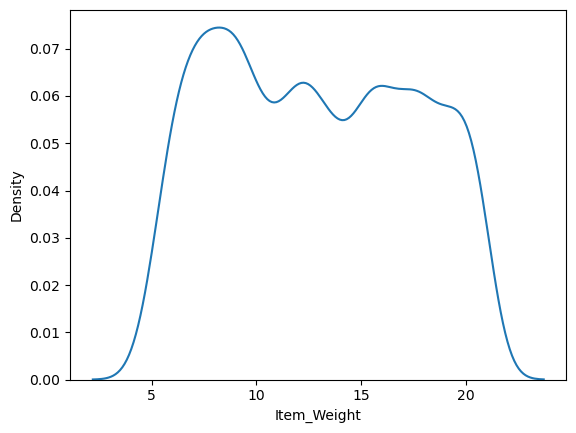%0A)

### As it is visible from the graph above Item_Weight is almost uniformly distributed so it's entropy must be high in the training dataset<a
href="#As-it-is-visible-from-the-graph-above-Item_Weight-is-almost-uniformly-distributed-so-it&#39;s-entropy-must-be-high-in-the-training-dataset"
class="anchor-link">¶</a>

### We then calculate Entropy distribution for the testing Dataset<a
href="#We-then-calculate-Entropy-distribution-for-the-testing-Dataset"
class="anchor-link">¶</a>

In \[22\]:

    x=Salestest.drop('Item_Weight',axis=1)
    for i in x.columns:
        H=x[i]
        H=np.array(H)
        Counter(H)
        J=[]
        entropy=0
        for j in Counter(H):
            p=Counter(H)[j]
            J==J.append(p)
        for k in J:
            a_k=-(k/len(H))*(math.log(k/len(H),len(J)))
            entropy=entropy+a_k
        print (f"The entropy for {i} is {entropy}")    

    The entropy for Item_Identifier is 0.9890062352875344
    The entropy for Item_Fat_Content is 0.5625153732709652
    The entropy for Item_Visibility is 0.9645968858582553
    The entropy for Item_Type is 0.9137299613085187
    The entropy for Item_MRP is 0.9903016313311045
    The entropy for Outlet_Identifier is 0.9919420219573883
    The entropy for Outlet_Establishment_Year is 0.9883871445154377
    The entropy for Outlet_Size is 0.9530602028397074
    The entropy for Outlet_Location_Type is 0.9912632408343459
    The entropy for Outlet_Type is 0.7384116845306994

### From the entropy calculation above one can say Item_Fat_Content is the most imbalanced variable while Outlet_Location_type is the most balanced variable in the dataset respectively<a
href="#From-the-entropy-calculation-above-one-can-say-Item_Fat_Content-is-the-most-imbalanced-variable-while-Outlet_Location_type-is-the-most-balanced-variable-in-the-dataset-respectively"
class="anchor-link">¶</a>

In \[23\]:

    sns.kdeplot(x=Salestest['Item_Weight'])

Out\[23\]:

    <AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

![](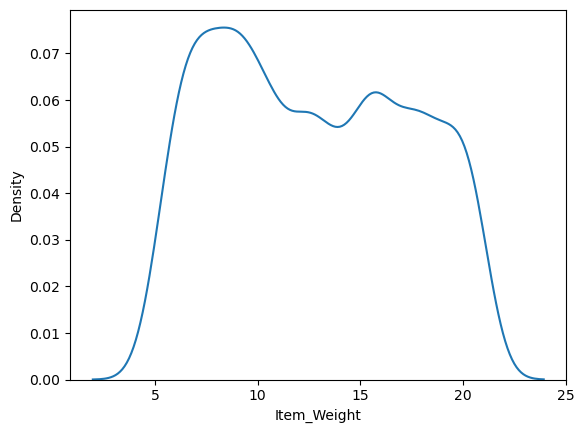%0A)

### As it is visible from the graph above Item_Weight is almost uniformly distributed so it's entropy must be high in the testing dataset<a
href="#As-it-is-visible-from-the-graph-above-Item_Weight-is-almost-uniformly-distributed-so-it&#39;s-entropy-must-be-high-in-the-testing-dataset"
class="anchor-link">¶</a>

## Data Cleaning<a href="#Data-Cleaning" class="anchor-link">¶</a>

#### Handling Null Values<a href="#Handling-Null-Values" class="anchor-link">¶</a>

In \[24\]:

    plt.figure(figsize=(18,10))

    plt.subplot(2,2,1)
    plt.title('Item_Weight in Train dataset')
    sns.boxplot(x='Item_Weight', data=Salestrain)

    plt.subplot(2,2,2)
    plt.title('Item_Weight in Test dataset')
    sns.boxplot(x='Item_Weight', data=Salestest)

    plt.show()

![](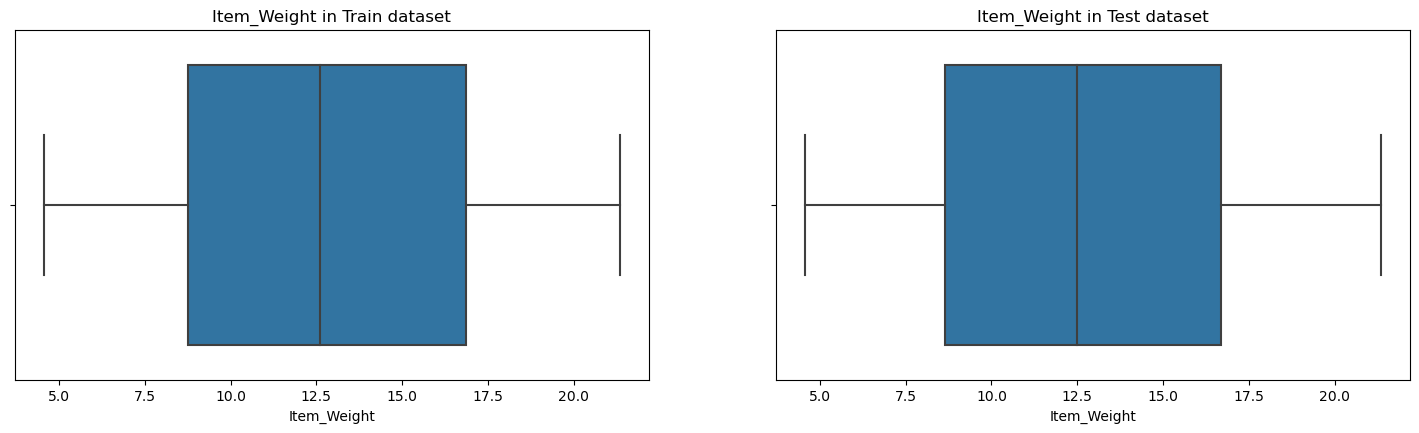%0A)

#### from box plot Item Weight dosen't appear to have outliers in both datasets, so our mean won't be affected<a
href="#from-box-plot-Item-Weight-dosen&#39;t-appear-to-have-outliers-in-both-datasets,-so-our-mean-won&#39;t-be-affected"
class="anchor-link">¶</a>

In \[25\]:

    # Use the mean to replace the null values in Item_Weight feature
    Salestrain.Item_Weight = Salestrain.Item_Weight.fillna(Salestrain.Item_Weight.mean())
    Salestest.Item_Weight = Salestest.Item_Weight.fillna(Salestest.Item_Weight.mean())

In \[26\]:

    Salestrain.mode()

Out\[26\]:

|     | Item_Identifier | Item_Weight | Item_Fat_Content | Item_Visibility | Item_Type             | Item_MRP | Outlet_Identifier | Outlet_Establishment_Year | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Item_Outlet_Sales |
|-----|-----------------|-------------|------------------|-----------------|-----------------------|----------|-------------------|---------------------------|-------------|----------------------|-------------------|-------------------|
| 0   | FDG33           | 12.857645   | Low Fat          | 0.0             | Fruits and Vegetables | 172.0422 | OUT027            | 1985.0                    | Medium      | Tier 3               | Supermarket Type1 | 958.752           |
| 1   | FDW13           | NaN         | NaN              | NaN             | NaN                   | NaN      | NaN               | NaN                       | NaN         | NaN                  | NaN               | NaN               |

In \[27\]:

    Salestrain.Outlet_Size.unique()

Out\[27\]:

    array(['Medium', nan, 'High', 'Small'], dtype=object)

In \[28\]:

    Salestrain.Outlet_Size.value_counts()

Out\[28\]:

    Medium    2793
    Small     2388
    High       932
    Name: Outlet_Size, dtype: int64

In \[29\]:

    Salestest.Outlet_Size.value_counts()

Out\[29\]:

    Medium    1862
    Small     1592
    High       621
    Name: Outlet_Size, dtype: int64

#### here we can replace the null values with the mode because it is a categorical column<a
href="#here-we-can-replace-the-null-values-with-the-mode-because-it-is-a-categorical-column"
class="anchor-link">¶</a>

In \[30\]:

    Salestrain.Outlet_Size = Salestrain.Outlet_Size.fillna(Salestrain.Outlet_Size.mode()[0])
    Salestest.Outlet_Size = Salestest.Outlet_Size.fillna(Salestest.Outlet_Size.mode()[0])

In \[31\]:

    Salestrain.isnull().sum()

Out\[31\]:

    Item_Identifier              0
    Item_Weight                  0
    Item_Fat_Content             0
    Item_Visibility              0
    Item_Type                    0
    Item_MRP                     0
    Outlet_Identifier            0
    Outlet_Establishment_Year    0
    Outlet_Size                  0
    Outlet_Location_Type         0
    Outlet_Type                  0
    Item_Outlet_Sales            0
    dtype: int64

In \[32\]:

    Salestest.isnull().sum()

Out\[32\]:

    Item_Identifier              0
    Item_Weight                  0
    Item_Fat_Content             0
    Item_Visibility              0
    Item_Type                    0
    Item_MRP                     0
    Outlet_Identifier            0
    Outlet_Establishment_Year    0
    Outlet_Size                  0
    Outlet_Location_Type         0
    Outlet_Type                  0
    dtype: int64

# EDA(Exploratory Data Analysis)<a href="#EDA(Exploratory-Data-Analysis)" class="anchor-link">¶</a>

In \[33\]:

    Salestrain.nunique()

Out\[33\]:

    Item_Identifier              1559
    Item_Weight                   416
    Item_Fat_Content                5
    Item_Visibility              7880
    Item_Type                      16
    Item_MRP                     5938
    Outlet_Identifier              10
    Outlet_Establishment_Year       9
    Outlet_Size                     3
    Outlet_Location_Type            3
    Outlet_Type                     4
    Item_Outlet_Sales            3493
    dtype: int64

In \[34\]:

    Salestrain.Item_Fat_Content.unique()

Out\[34\]:

    array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In \[35\]:

    Salestrain.Item_Fat_Content.value_counts()

Out\[35\]:

    Low Fat    5089
    Regular    2889
    LF          316
    reg         117
    low fat     112
    Name: Item_Fat_Content, dtype: int64

We see there are some irregularities in the column and it is needed to
fix them! for example there is low fat one with upper case and other
with lower case and another abbreviated (LF) also Regular and reg so we
have 2 types of item fat content Low fat and regular

In \[36\]:

    Salestrain.Item_Fat_Content = Salestrain.Item_Fat_Content.replace(to_replace=['low fat', 'LF', 'reg'], value=['Low Fat', 'Low Fat', 'Regular'])

In \[37\]:

    Salestrain.Item_Fat_Content.value_counts()

Out\[37\]:

    Low Fat    5517
    Regular    3006
    Name: Item_Fat_Content, dtype: int64

In \[38\]:

    Salestest.Item_Fat_Content.unique()

Out\[38\]:

    array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In \[39\]:

    Salestest.Item_Fat_Content.value_counts()

Out\[39\]:

    Low Fat    3396
    Regular    1935
    LF          206
    reg          78
    low fat      66
    Name: Item_Fat_Content, dtype: int64

same problem in the testing data

In \[40\]:

    Salestest.Item_Fat_Content = Salestest.Item_Fat_Content.replace(to_replace=['low fat', 'LF', 'reg'], value=['Low Fat', 'Low Fat', 'Regular'])

In \[41\]:

    Salestest.Item_Fat_Content.value_counts()

Out\[41\]:

    Low Fat    3668
    Regular    2013
    Name: Item_Fat_Content, dtype: int64

In \[42\]:

    Salestest.Item_Fat_Content.unique()

Out\[42\]:

    array(['Low Fat', 'Regular'], dtype=object)

In \[43\]:

    Salestest.Item_Fat_Content.value_counts()

Out\[43\]:

    Low Fat    3668
    Regular    2013
    Name: Item_Fat_Content, dtype: int64

In \[44\]:

    plt.figure(figsize=(18,12))

    plt.subplot(2,2,1)
    plt.title("Item_Fat_Content Count in the Training Data")
    sns.countplot(x='Item_Fat_Content', data=Salestrain, palette='ocean')

    plt.subplot(2,2,2)
    low_fat = Salestrain.Item_Fat_Content[Salestrain.Item_Fat_Content == 'Low Fat'].count()
    reg = Salestrain.Item_Fat_Content[Salestrain.Item_Fat_Content == 'Regular'].count()
    plt.title("Item Content Fat Distrbution in the Training Data")
    plt.pie([low_fat, reg], labels=['Low Fat', 'Regular'], explode=[0.01,0.01], autopct="%.2f%%", colors=['lightgreen', 'yellow'], shadow=True)
    plt.legend()

    plt.show()

![](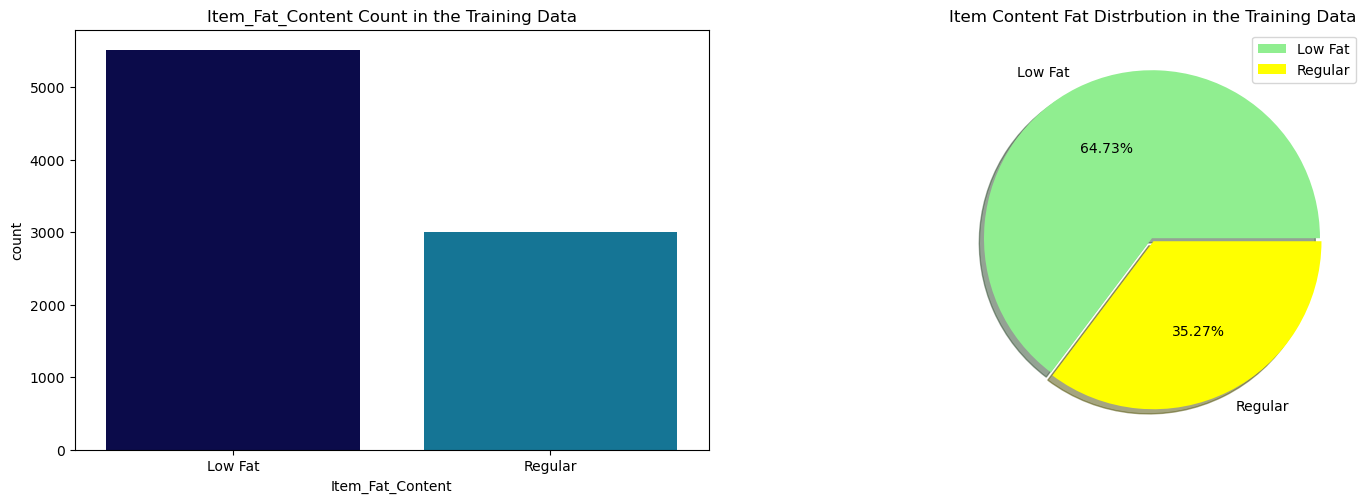%0A)

#### While Low Fat has the majority in the data constituting 64.73% of the products sold Regular constitutes 35.27% of the fat distribution<a
href="#While-Low-Fat-has-the-majority-in-the-data-constituting-64.73%25-of-the-products-sold-Regular-constitutes-35.27%25-of-the-fat-distribution"
class="anchor-link">¶</a>

In \[45\]:

    plt.figure(figsize=(25,8))
    plt.title("Item Type count in the Training data", {"fontsize" : 25})
    order = Salestrain.groupby('Item_Type').count().sort_values(by='Item_Outlet_Sales', ascending=False).index
    sns.countplot(x='Item_Type', data=Salestrain, order=order);

![](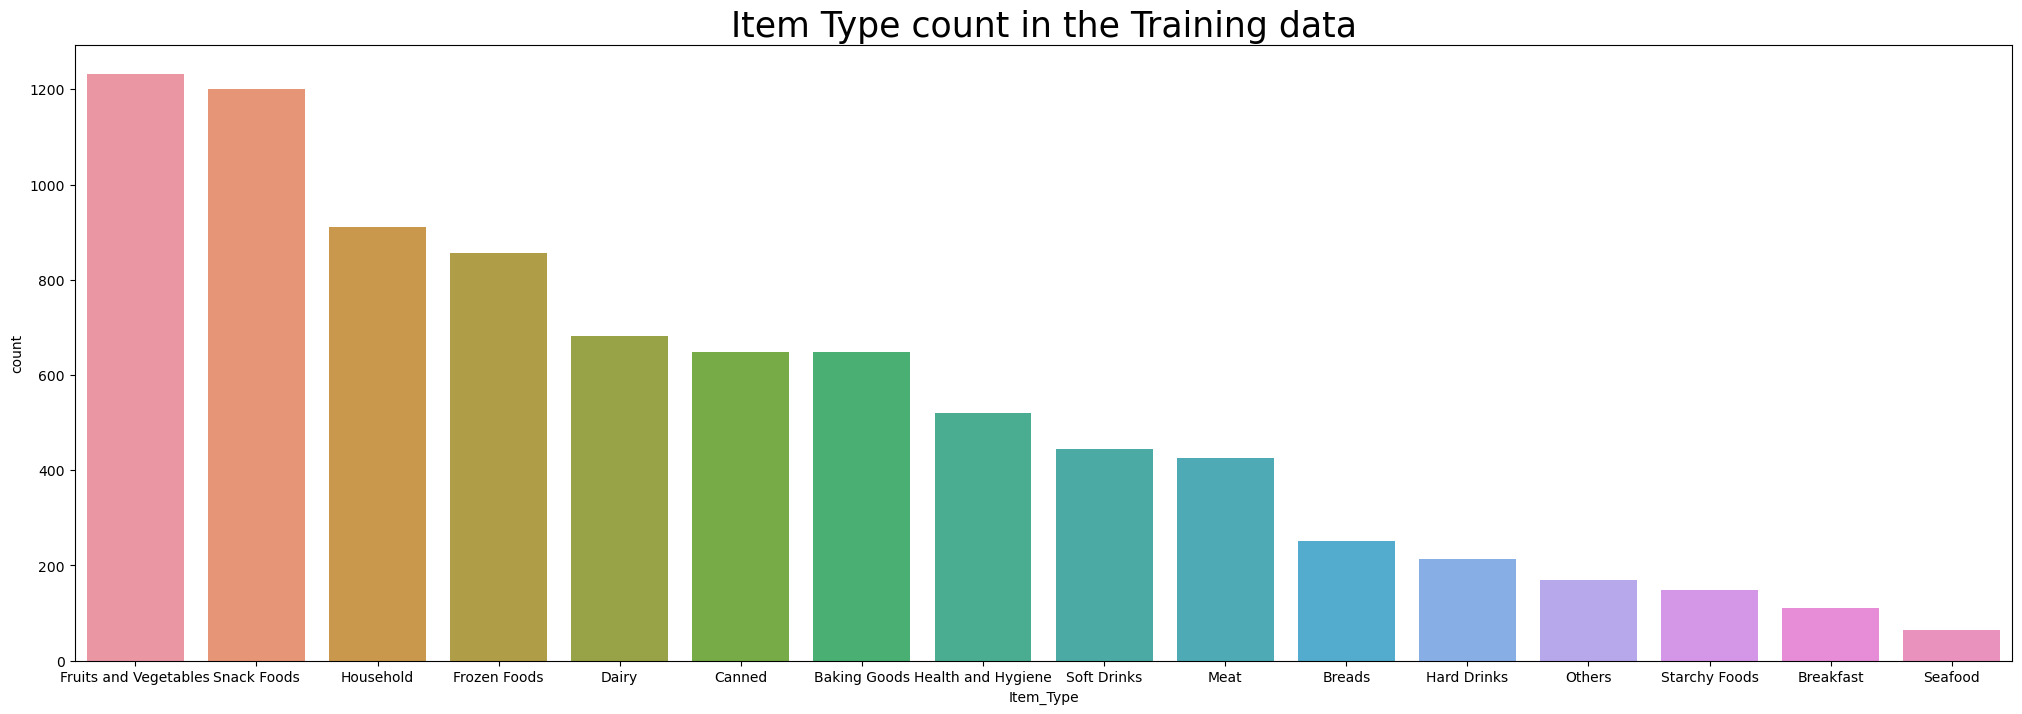%0A)

#### Fruits and Vegetables are largely sold as people tend to use them on daily purpose. Snack Foods too have good sales followed by Household products while Seafood has the lowest Sales<a
href="#Fruits-and-Vegetables-are-largely-sold-as-people-tend-to-use-them-on-daily-purpose.-Snack-Foods-too-have-good-sales-followed-by-Household-products-while-Seafood-has-the-lowest-Sales"
class="anchor-link">¶</a>

In \[46\]:

    Salestrain.Outlet_Size.value_counts()

Out\[46\]:

    Medium    5203
    Small     2388
    High       932
    Name: Outlet_Size, dtype: int64

In \[47\]:

    plt.figure(figsize=(18,12))

    plt.subplot(2,2,1)
    plt.title("The size of the store in terms of ground area covered count")
    sns.countplot(x='Outlet_Size', data=Salestrain, palette='spring')

    plt.subplot(2,2,2)
    medium = Salestrain.Outlet_Size[Salestrain.Outlet_Size == 'Medium'].count()
    small = Salestrain.Outlet_Size[Salestrain.Outlet_Size == 'Small'].count()
    high = Salestrain.Outlet_Size[Salestrain.Outlet_Size == 'High'].count()
    plt.title("The size of the store in terms of ground area covered Distrbution")
    plt.pie([medium, small, high], labels=['Medium', 'Small', 'High'], autopct="%.2f%%", shadow=True, explode=[0.01,0.01,0.01])
    my_circle = plt.Circle( (0,0), 0.4, color='white')
    plt.gcf().gca().add_artist(my_circle)
    plt.legend()

    plt.show()

![](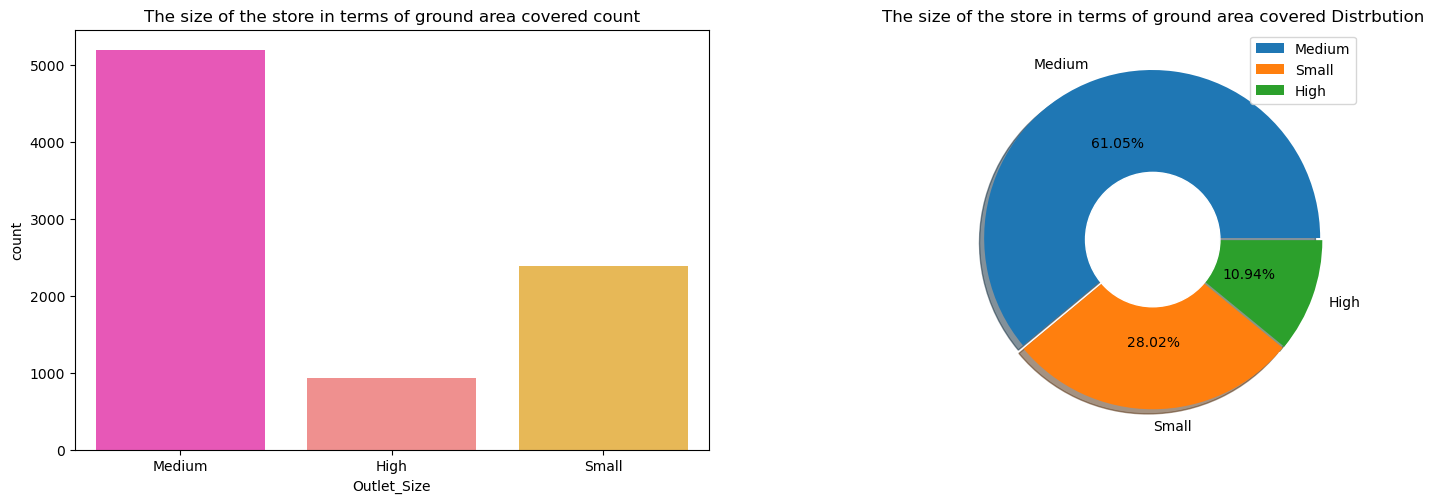%0A)

### Medium Size store has the majority in the data 61.05% in terms of ground covered followed by Small size store and High size store respectively<a
href="#Medium-Size-store-has-the-majority-in-the-data-61.05%25-in-terms-of-ground-covered-followed-by-Small-size-store-and-High-size-store-respectively"
class="anchor-link">¶</a>

In \[48\]:

    Salestrain.Outlet_Location_Type.unique()

Out\[48\]:

    array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In \[49\]:

    Salestrain.Outlet_Location_Type.value_counts()

Out\[49\]:

    Tier 3    3350
    Tier 2    2785
    Tier 1    2388
    Name: Outlet_Location_Type, dtype: int64

In \[50\]:

    plt.figure(figsize=(18,12))

    plt.subplot(2,2,1)
    plt.title("The type of city in which the store is located")
    sns.countplot(x='Outlet_Location_Type', data=Salestrain, palette='twilight')

    plt.subplot(2,2,2)
    tier_1 = Salestrain.Outlet_Location_Type[Salestrain.Outlet_Location_Type == 'Tier 1'].count()
    tier_2 = Salestrain.Outlet_Location_Type[Salestrain.Outlet_Location_Type == 'Tier 2'].count()
    tier_3 = Salestrain.Outlet_Location_Type[Salestrain.Outlet_Location_Type == 'Tier 3'].count()
    plt.title("The type of city in which the store is located Distrbution")
    plt.pie([tier_1, tier_2, tier_3], labels=['tier_1', 'tier_2', 'tier_3'], autopct="%.2f%%", shadow=True, explode=[0.05,0.05,0.05])
    my_circle = plt.Circle( (0,0), 0.4, color='white')
    plt.gcf().gca().add_artist(my_circle)
    plt.legend()

    plt.show()

![](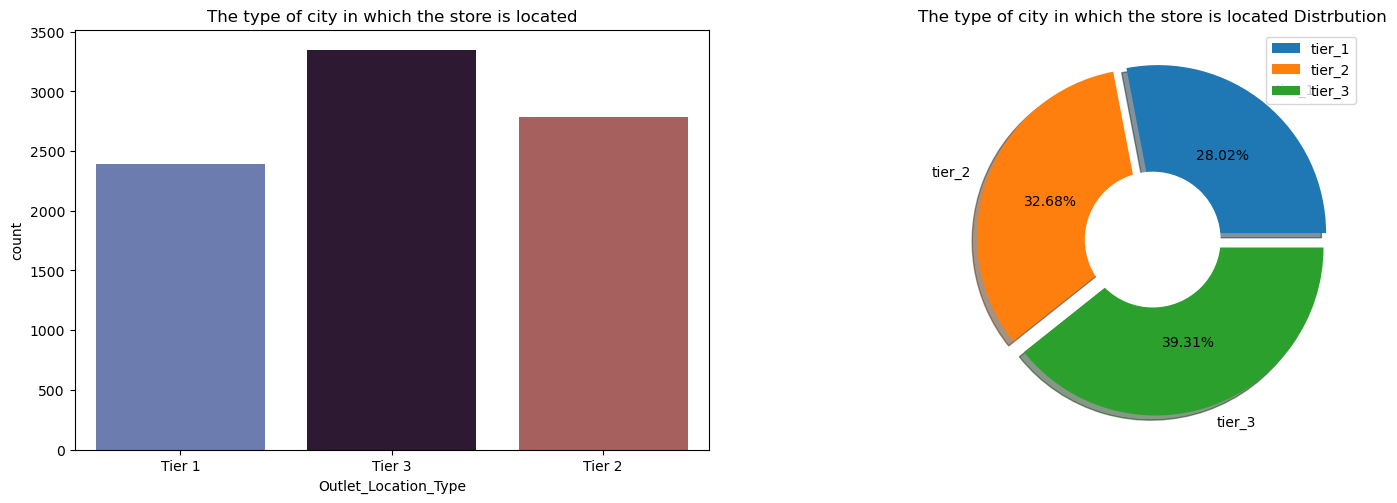%0A)

#### The Outlets are maximum in number in Tier 3 Cities and Tire 3 Outlets comprised 39.1% of the Total number of Outlets while Tire 1 Outlets comprised only 28.02% of the Total Outlets respectively<a
href="#The-Outlets-are-maximum-in-number-in-Tier-3-Cities-and-Tire-3-Outlets-comprised-39.1%25-of-the-Total-number-of-Outlets-while-Tire-1-Outlets-comprised-only-28.02%25-of-the-Total-Outlets-respectively"
class="anchor-link">¶</a>

In \[51\]:

    Salestrain.Outlet_Type.unique()

Out\[51\]:

    array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
           'Supermarket Type3'], dtype=object)

In \[52\]:

    Salestrain.Outlet_Type.value_counts()

Out\[52\]:

    Supermarket Type1    5577
    Grocery Store        1083
    Supermarket Type3     935
    Supermarket Type2     928
    Name: Outlet_Type, dtype: int64

In \[53\]:

    plt.figure(figsize=(18,12))

    plt.subplot(2,2,1)
    plt.title("Whether the outlet is just a grocery store or some sort of supermarket count")
    sns.countplot(x='Outlet_Type', data=Salestrain, palette='autumn')

    plt.subplot(2,2,2)
    sup_1 = Salestrain.Outlet_Type[Salestrain.Outlet_Type == 'Supermarket Type1'].count()
    goc = Salestrain.Outlet_Type[Salestrain.Outlet_Type == 'Grocery Store'].count()
    sup_3 = Salestrain.Outlet_Type[Salestrain.Outlet_Type == 'Supermarket Type3'].count()
    sup_2 = Salestrain.Outlet_Type[Salestrain.Outlet_Type == 'Supermarket Type2'].count()
    plt.title("Whether the outlet is just a grocery store or some sort of supermarket Distrbution")
    plt.pie([sup_1, goc, sup_3, sup_2], labels=['Supermarket Type1', 'Grocery Store', 'Supermarket Type3', 'Supermarket Type2'], autopct="%.2f%%", shadow=True, explode=[0.01,0.01,0.01, 0.01])
    my_circle = plt.Circle( (0,0), 0.4, color='white')
    plt.gcf().gca().add_artist(my_circle)
    plt.legend(bbox_to_anchor=(1, 0))

    plt.show()

![](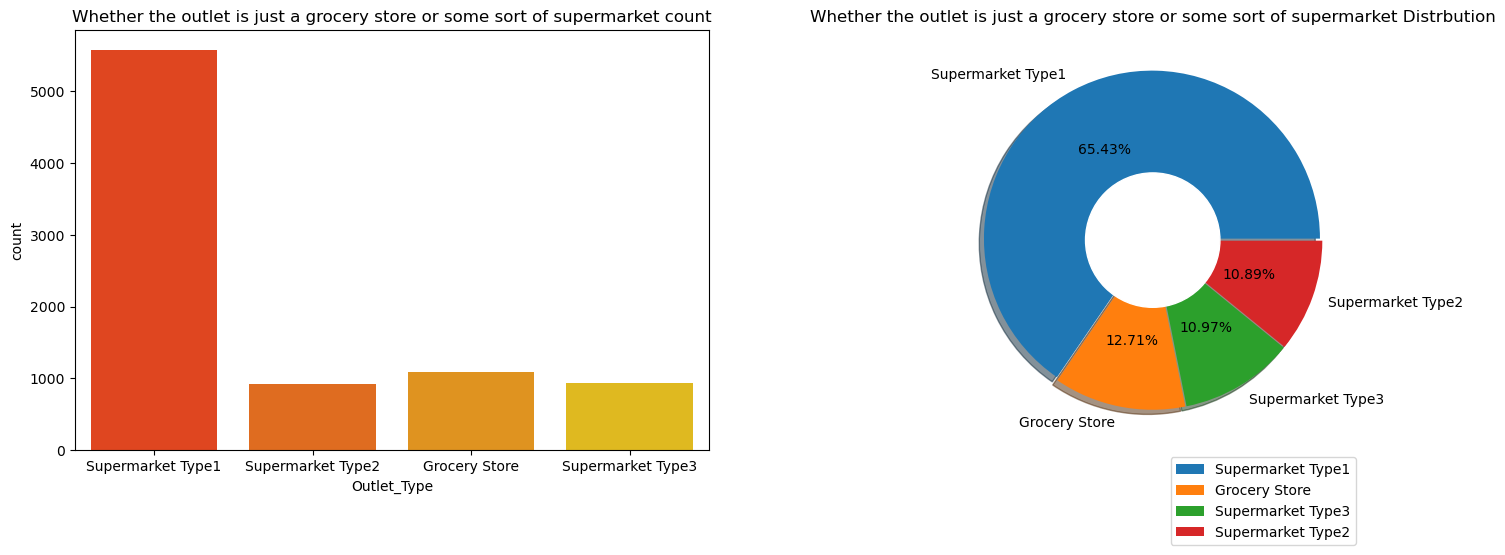%0A)

#### Supermarket Type 1 Outlets comprised maximum 65.43% of the total number of outlets while Supermarket Type 2 Outlets comprised only 10.89% of the total number of outlets respectively<a
href="#Supermarket-Type-1-Outlets-comprised-maximum-65.43%25-of-the-total-number-of-outlets-while-Supermarket-Type-2-Outlets-comprised-only-10.89%25-of-the-total-number-of-outlets-respectively"
class="anchor-link">¶</a>

In \[54\]:

    Salestrain.Outlet_Establishment_Year.unique()

Out\[54\]:

    array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In \[55\]:

    Salestrain['Age'] = 2023 - Salestrain.Outlet_Establishment_Year
    Salestest['Age'] = 2023 - Salestest.Outlet_Establishment_Year

In \[56\]:

    plt.figure(figsize=(12,6))

    sns.countplot(x='Age', data=Salestrain, palette='autumn');

![](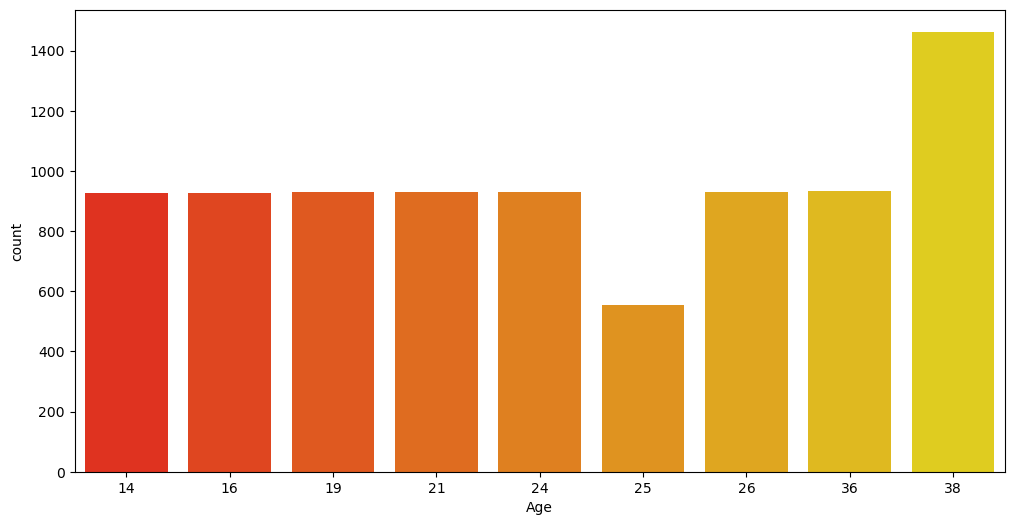%0A)

#### Most of the outlets has been running for 38 years since establishment while outlets running for 25 years is comparatively lower than the average outlet count in terms of years running since establishment respectively<a
href="#Most-of-the-outlets-has-been-running-for-38-years-since-establishment-while-outlets-running-for-25-years-is-comparatively-lower-than-the-average-outlet-count-in-terms-of-years-running-since-establishment-respectively"
class="anchor-link">¶</a>

In \[57\]:

    Salestrain.nunique()

Out\[57\]:

    Item_Identifier              1559
    Item_Weight                   416
    Item_Fat_Content                2
    Item_Visibility              7880
    Item_Type                      16
    Item_MRP                     5938
    Outlet_Identifier              10
    Outlet_Establishment_Year       9
    Outlet_Size                     3
    Outlet_Location_Type            3
    Outlet_Type                     4
    Item_Outlet_Sales            3493
    Age                             9
    dtype: int64

In \[58\]:

    FEATURES = [col for col in Salestrain.columns if col not in ['Item_Outlet_Sales', 'Outlet_Identifier']]
    cat_features = [col for col in FEATURES if Salestrain[col].nunique() < 10]
    cont_features = [col for col in FEATURES if Salestrain[col].nunique() >= 10]

In \[59\]:

    cat_features

Out\[59\]:

    ['Item_Fat_Content',
     'Outlet_Establishment_Year',
     'Outlet_Size',
     'Outlet_Location_Type',
     'Outlet_Type',
     'Age']

In \[60\]:

    cont_features

Out\[60\]:

    ['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP']

In \[61\]:

    ncols = 3
    nrows = int(len(cat_features) / ncols + (len(FEATURES) % ncols > 0))-1

    fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

    for r in range(nrows):
        for c in range(ncols):
            col = cat_features[r*ncols+c]
            sns.barplot(y=Salestrain['Item_Outlet_Sales'], x=Salestrain[col], ax=axes[r, c], palette='autumn', label='Train data')
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel(col, fontsize=12, fontweight='bold')
            axes[r, c].tick_params(labelsize=10, width=0.5)
            axes[r, c].xaxis.offsetText.set_fontsize(6)
            axes[r, c].yaxis.offsetText.set_fontsize(6)
    plt.show()

![](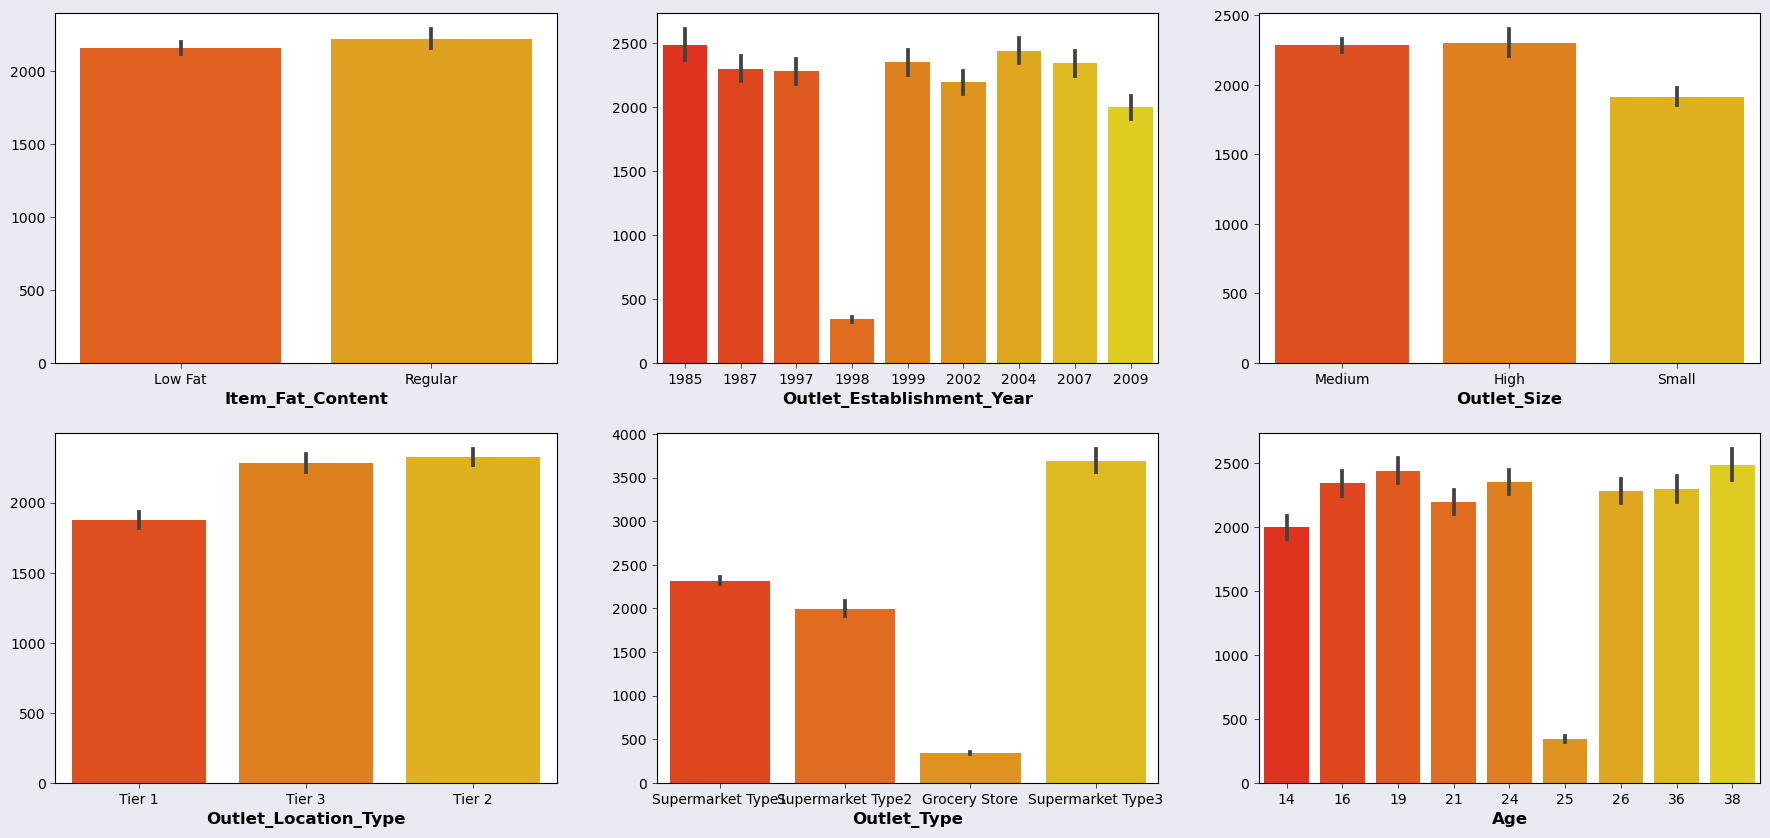%0A)

#### 1)The Item Outles sales are high for both Low Fat and Regular Item types.<a
href="#1)The-Item-Outles-sales-are-high-for-both-Low-Fat-and-Regular-Item-types."
class="anchor-link">¶</a>

#### 2)The Outlet Sales is maximum for Medium and High sized Outlets.<a
href="#2)The-Outlet-Sales-is-maximum-for-Medium-and-High-sized-Outlets."
class="anchor-link">¶</a>

#### 3)The Outlets we have is Medium and may be with High size Outlets can improve the Outlet Sales.<a
href="#3)The-Outlets-we-have-is-Medium-and-may-be-with-High-size-Outlets-can-improve-the-Outlet-Sales."
class="anchor-link">¶</a>

#### 4)The Outlet Sales tend to be high for Tier3 and Tier 2 location types but we have only Tier3 locations maximum Outlets.<a
href="#4)The-Outlet-Sales-tend-to-be-high-for-Tier3-and-Tier-2-location-types-but-we-have-only-Tier3-locations-maximum-Outlets."
class="anchor-link">¶</a>

#### 5)Supermarket Type3 sales tends to be high which in Grocery store is very low<a
href="#5)Supermarket-Type3-sales-tends-to-be-high-which-in-Grocery-store-is-very-low"
class="anchor-link">¶</a>

#### 6)It is quiet evident that Outlets established 36 years before is having good Sales margin.<a
href="#6)It-is-quiet-evident-that-Outlets-established-36-years-before-is-having-good-Sales-margin."
class="anchor-link">¶</a>

#### 7)We also have a outlet which was established before 23 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest<a
href="#7)We-also-have-a-outlet-which-was-established-before-23-years-has-the-lowest-sales-margin,-so-established-years-wouldn&#39;t-improve-the-Sales-unless-the-products-are-sold-according-to-customer&#39;s-interest"
class="anchor-link">¶</a>

In \[62\]:

    plt.figure(figsize=(25,8))

    order=Salestrain.groupby('Item_Type').mean().sort_values(by='Item_Outlet_Sales', ascending=False).index
    sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=Salestrain,palette='spring', order=order);

![](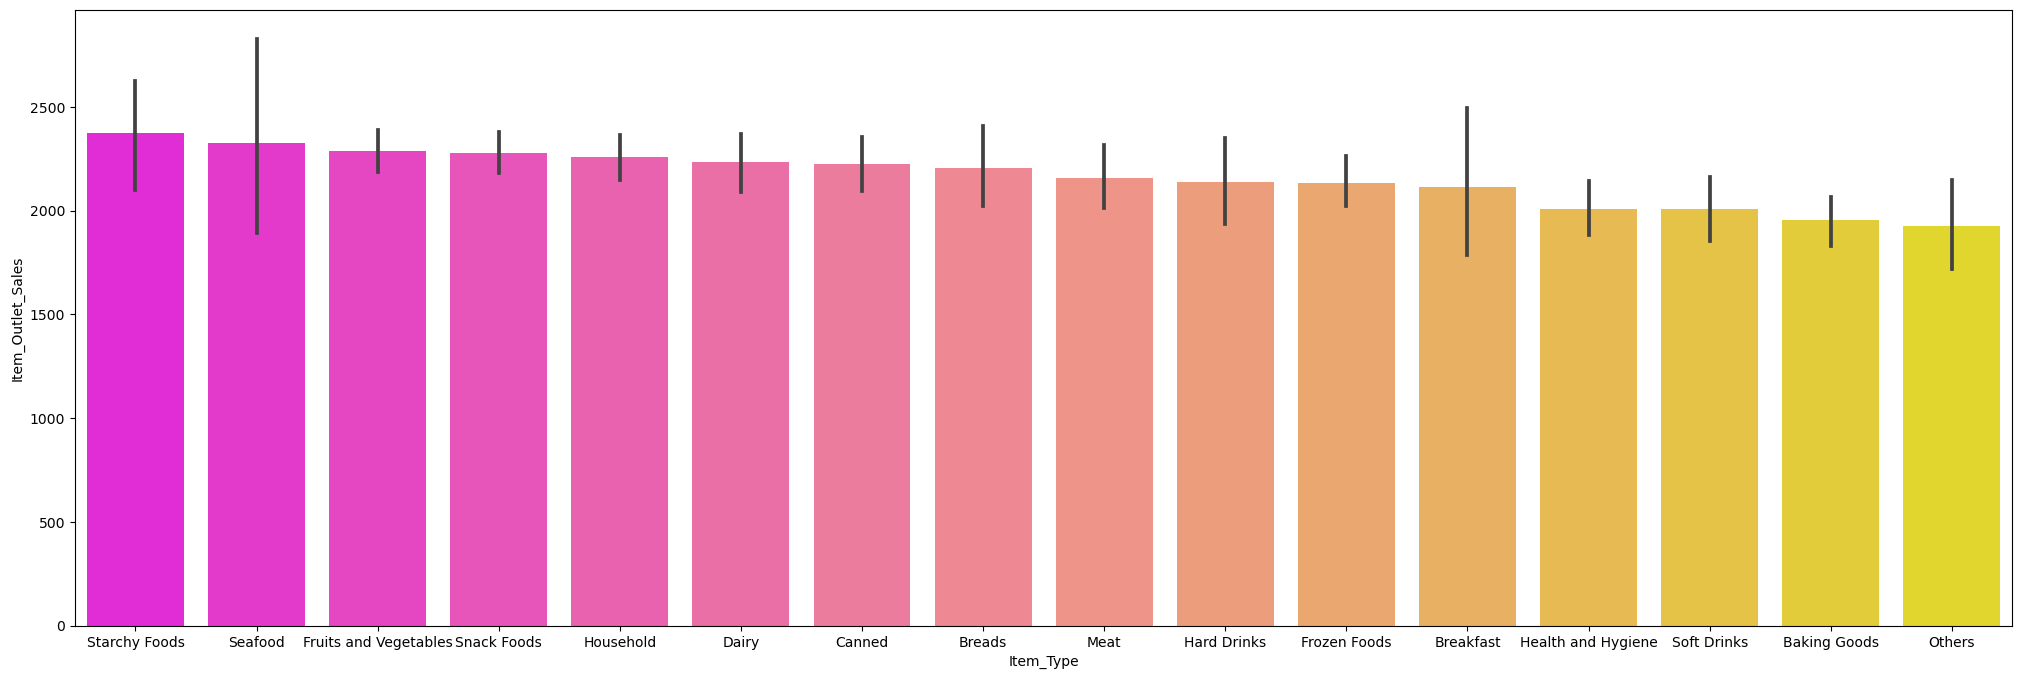%0A)

#### Most of the the products kept in an outlet were Fruits-Veggies, Snack Foods and Households has a higher number of total sales but the average sales of Seafood and Starchy Foods has been higher , Seafood seems higher indicating Seafoof and Starchy foods have been kept in lower amount of outlets inspite of being received by Customers very well respectively<a
href="#Most-of-the-the-products-kept-in-an-outlet-were-Fruits-Veggies,-Snack-Foods-and-Households-has-a-higher-number-of-total-sales-but-the-average-sales-of-Seafood-and-Starchy-Foods-has-been-higher-,-Seafood-seems-higher-indicating-Seafoof-and-Starchy-foods-have-been-kept-in-lower-amount-of-outlets-inspite-of-being-received-by-Customers-very-well-respectively"
class="anchor-link">¶</a>

In \[63\]:

    Salestrain.nunique()

Out\[63\]:

    Item_Identifier              1559
    Item_Weight                   416
    Item_Fat_Content                2
    Item_Visibility              7880
    Item_Type                      16
    Item_MRP                     5938
    Outlet_Identifier              10
    Outlet_Establishment_Year       9
    Outlet_Size                     3
    Outlet_Location_Type            3
    Outlet_Type                     4
    Item_Outlet_Sales            3493
    Age                             9
    dtype: int64

In \[64\]:

    FEATURES = [col for col in Salestrain.columns if col not in ['Item_Outlet_Sales', 'Outlet_Identifier', 'Item_Identifier']]
    cat_features = [col for col in FEATURES if Salestrain[col].nunique() < 25]
    cont_features = [col for col in FEATURES if Salestrain[col].nunique() >= 25]

In \[65\]:

    cont_features

Out\[65\]:

    ['Item_Weight', 'Item_Visibility', 'Item_MRP']

In \[196\]:

    # distrbution of the continous features
    plt.figure(figsize=(10,20))
    plt.subplot(4,1,1)
    plt.title("Item_Weight Distrbution")
    sns.kdeplot(x='Item_Weight', data=Salestrain)

    plt.subplot(4,1,2)
    plt.title("Item_Visibility Distrbution")
    sns.kdeplot(x='Item_Visibility', data=Salestrain);

    plt.subplot(4,1,3)
    plt.title("Item_MRP Distrbution")
    sns.kdeplot(x='Item_MRP', data=Salestrain);

    plt.subplot(4,1,4)
    plt.title("Item_Outlet_Sales")
    sns.kdeplot(x='Item_Outlet_Sales', data=Salestrain);

![](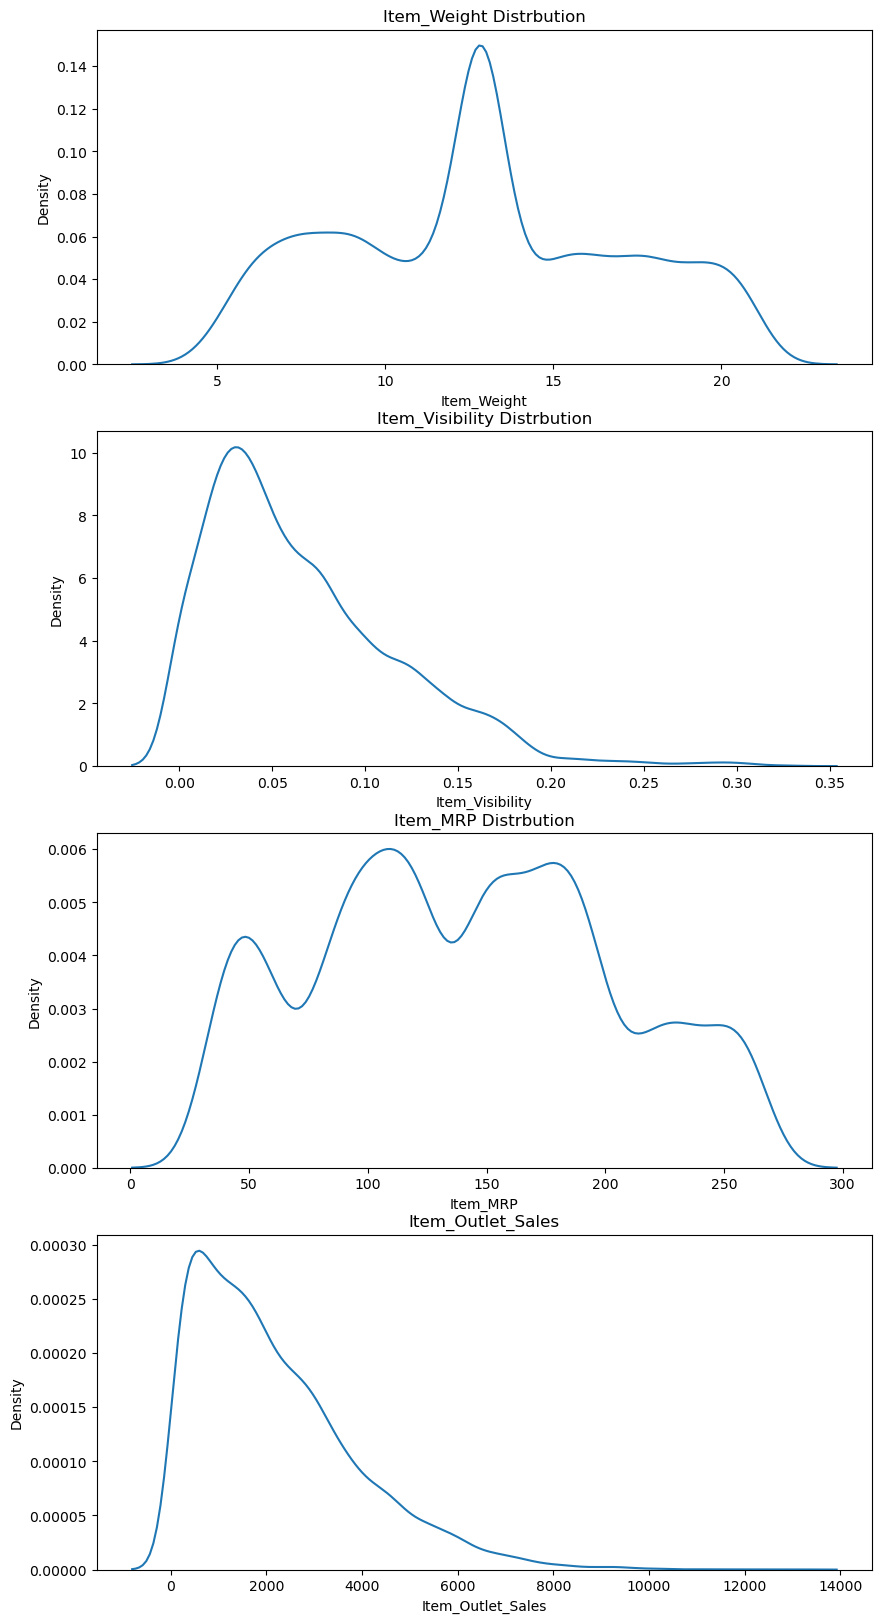%0A)

### While Item Outlet Sales and Item Visibility distribution is positively skewed indicating most of the outlets have sold 2000 items Item MRP and Item weight is more symmetrical while Item weight is more normally distributed respectively<a
href="#While-Item-Outlet-Sales-and-Item-Visibility-distribution-is-positively-skewed-indicating-most-of-the-outlets-have-sold-2000-items-Item-MRP-and-Item-weight-is-more-symmetrical-while-Item-weight-is-more-normally-distributed-respectively"
class="anchor-link">¶</a>

In \[67\]:

    plt.figure(figsize=(18,15))
    plt.subplot(3,1,1)
    sns.lineplot(x='Item_Weight', y='Item_Outlet_Sales', data=Salestrain);

    plt.subplot(3,1,2)
    sns.lineplot(x='Item_Visibility', y='Item_Outlet_Sales', data=Salestrain);

    plt.subplot(3,1,3)
    sns.lineplot(x='Item_MRP', y='Item_Outlet_Sales', data=Salestrain);

![](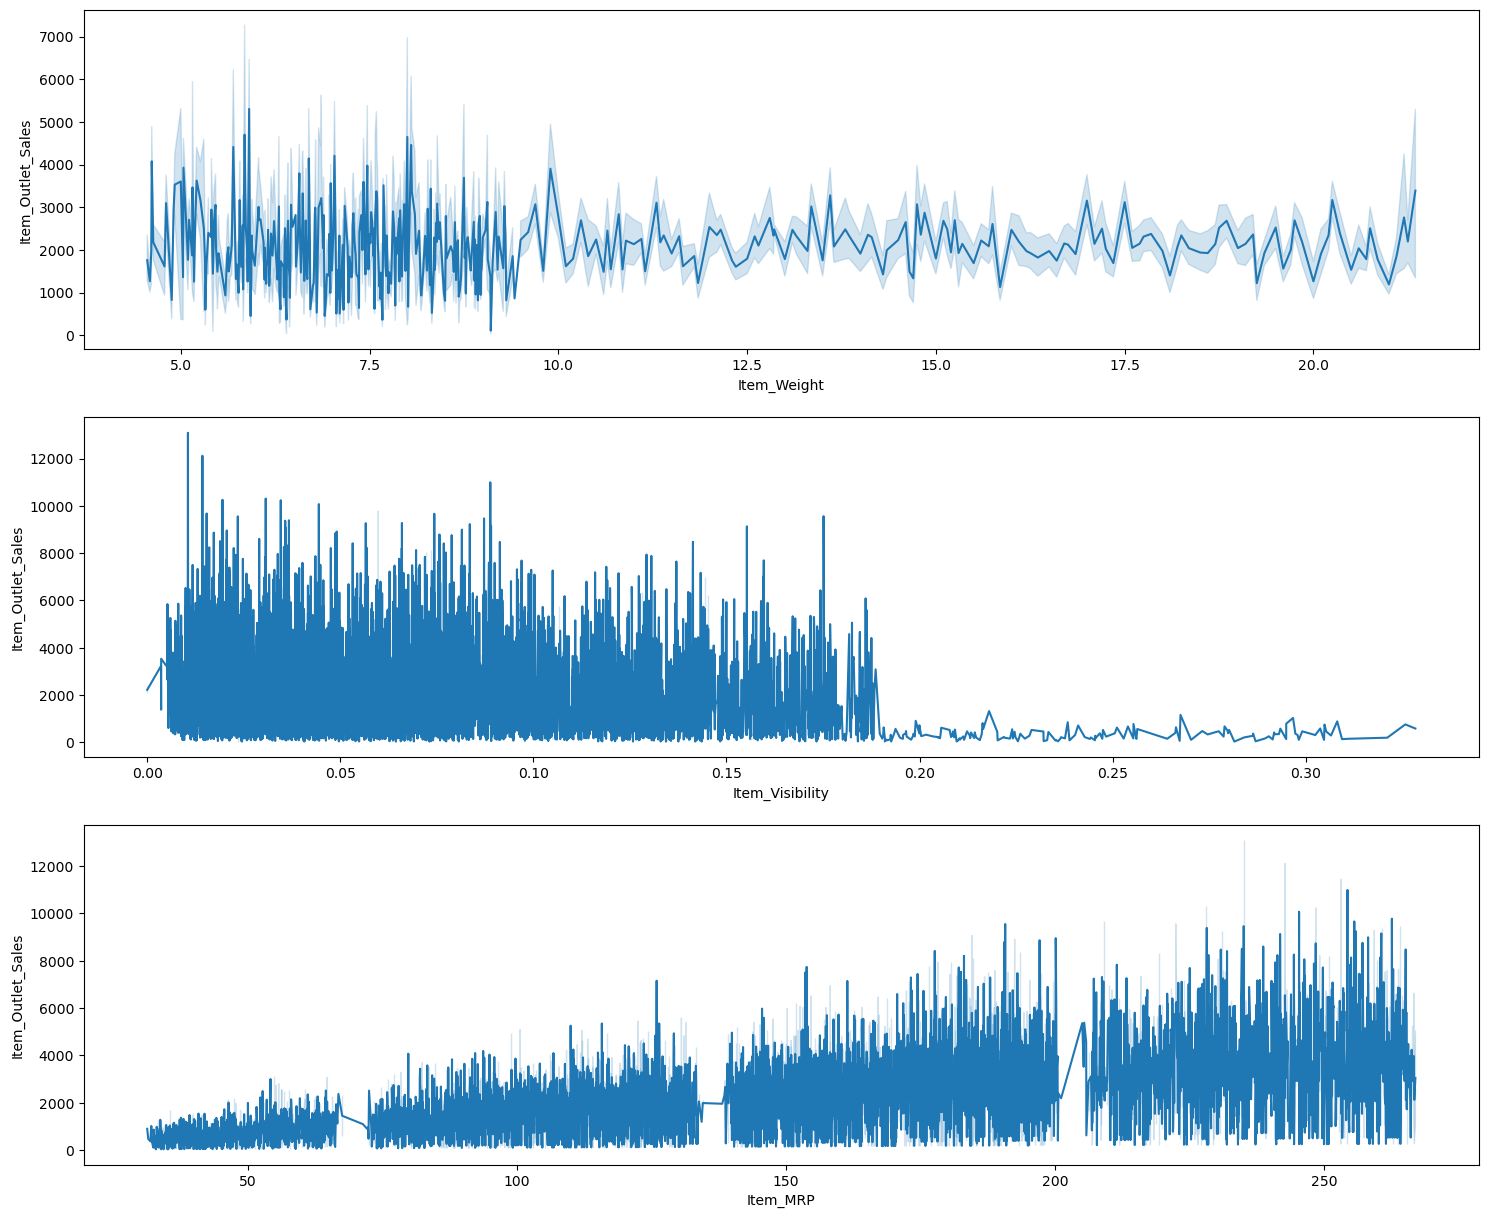%0A)

#### 1) While light weight Items have a higher amount of Sales overall Item Weight has almost no to very little impact of on Item Outlet Sales respectively<a
href="#1)-While-light-weight-Items-have-a-higher-amount-of-Sales-overall-Item-Weight-has-almost-no-to-very-little-impact-of-on-Item-Outlet-Sales-respectively"
class="anchor-link">¶</a>

#### 2) Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0. While Items with lower visibility has a higher amount of Item Outlet Sales Item Visibility has a lower amount of Sales respectively<a
href="#2)-Item_Visibility-has-a-minimum-value-of-zero.-This-makes-no-practical-sense-because-when-a-product-is-being-sold-in-a-store,-the-visibility-cannot-be-0.-While-Items-with-lower-visibility-has-a-higher-amount-of-Item-Outlet-Sales-Item-Visibility-has-a-lower-amount-of-Sales-respectively"
class="anchor-link">¶</a>

#### 3) The most striking thing visible from the diagram is higher product Price covaries with a higher amount of Item Sales respectively.Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0. Items MRP ranging from 200-250 dollars is having high Sales<a
href="#3)-The-most-striking-thing-visible-from-the-diagram-is-higher-product-Price-covaries-with-a-higher-amount-of-Item-Sales-respectively.Item_Visibility-has-a-minimum-value-of-zero.-This-makes-no-practical-sense-because-when-a-product-is-being-sold-in-a-store,-the-visibility-cannot-be-0.-Items-MRP-ranging-from-200-250-dollars-is-having-high-Sales"
class="anchor-link">¶</a>

In \[68\]:

    plt.figure(figsize=(25,5))
    sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=Salestrain,palette='mako')
    plt.legend();

![](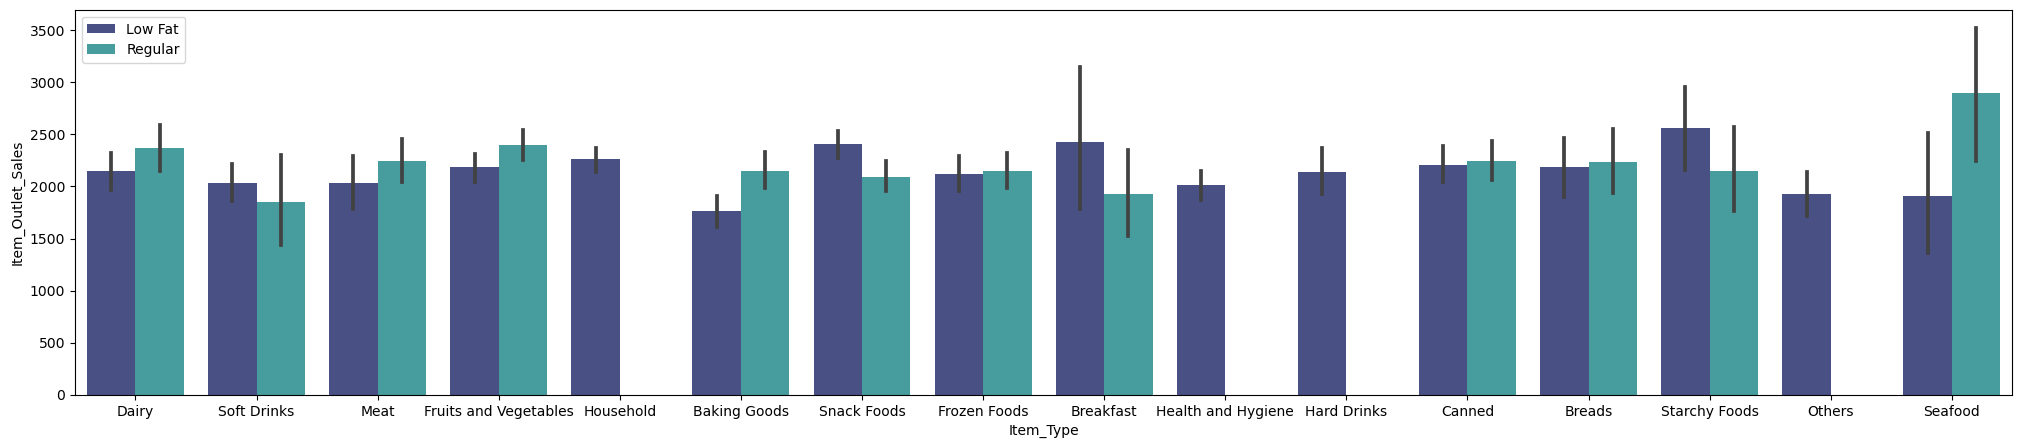%0A)

#### Seafood with Regular fat Content has the highest amount of Sales while Soft Drinks with Regular Fat content has lowest amount of sales respectively.<a
href="#Seafood-with-Regular-fat-Content-has-the-highest-amount-of-Sales-while-Soft-Drinks-with-Regular-Fat-content-has-lowest-amount-of-sales-respectively."
class="anchor-link">¶</a>

In \[69\]:

    plt.figure(figsize=(10,5))
    sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=Salestrain,palette='magma')
    plt.legend()
    plt.show()

![](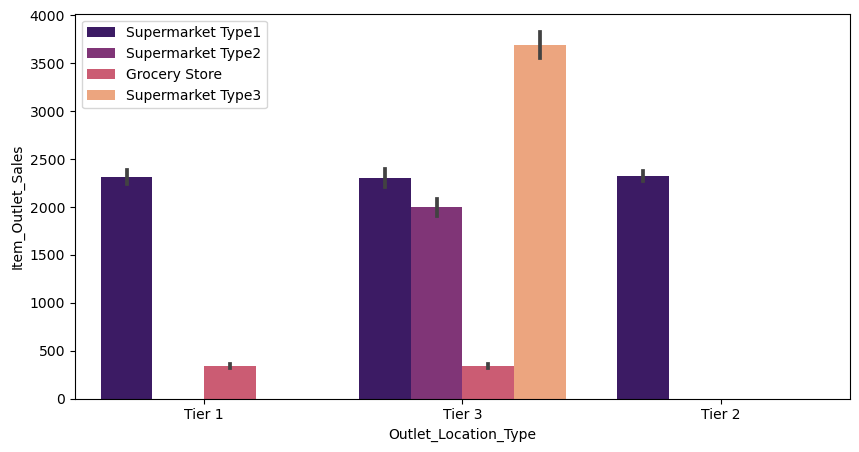%0A)

#### While Type 3 Supermarket in Tire 3 cities has highest amount of sales in Tier 3 and Tier 1 cities Grocery Stores have the lowest amount of Sales respectively.<a
href="#While-Type-3-Supermarket-in-Tire-3-cities-has-highest-amount-of-sales-in-Tier-3-and-Tier-1-cities--Grocery-Stores-have-the-lowest-amount-of-Sales-respectively."
class="anchor-link">¶</a>

In \[70\]:

    Salestrain.nunique()

Out\[70\]:

    Item_Identifier              1559
    Item_Weight                   416
    Item_Fat_Content                2
    Item_Visibility              7880
    Item_Type                      16
    Item_MRP                     5938
    Outlet_Identifier              10
    Outlet_Establishment_Year       9
    Outlet_Size                     3
    Outlet_Location_Type            3
    Outlet_Type                     4
    Item_Outlet_Sales            3493
    Age                             9
    dtype: int64

In \[71\]:

    plt.figure(figsize=(10,5))
    sns.barplot('Item_Fat_Content','Item_Outlet_Sales',hue='Outlet_Size',data=Salestrain,palette='autumn')
    plt.legend()
    plt.show()

![](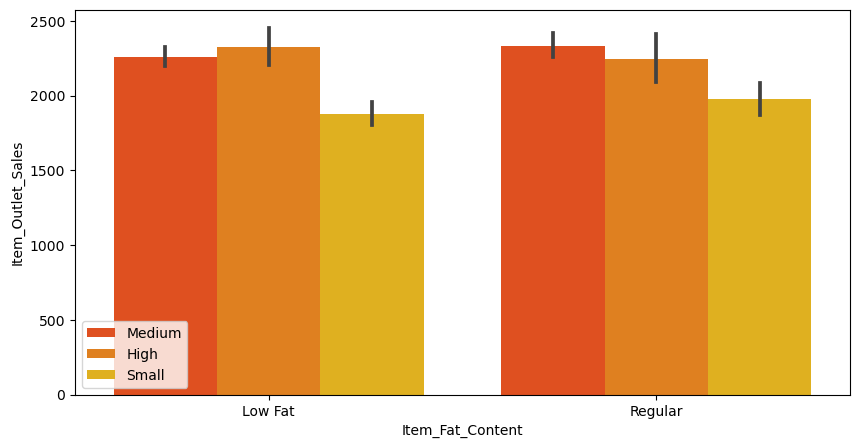%0A)

In \[72\]:

    plt.figure(figsize=(10,5))
    sns.barplot('Item_Fat_Content','Item_Outlet_Sales',hue='Outlet_Type',data=Salestrain,palette='summer')
    plt.legend()
    plt.show()

![](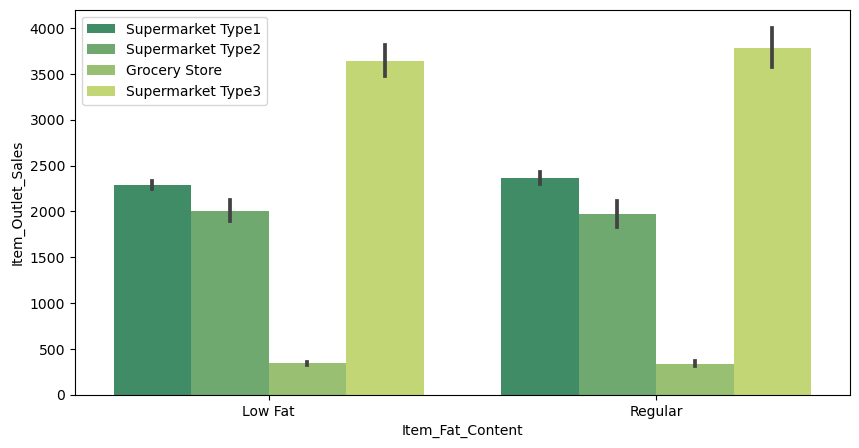%0A)

The Tier-3 location type has all types of Outlet type and has high sales
margin.

##### Check if there is any mismatch in the number of features between train and test<a
href="#Check-if-there-is-any-mismatch-in-the-number-of-features-between-train-and-test"
class="anchor-link">¶</a>

In \[73\]:

    missing_cols = []
    for column in Salestrain.loc[:, ~Salestrain.columns.isin(['Item_Outlet_Sales'])]:
        if column not in Salestest.columns:
            missing_cols.append()
    print("Number of features present in training data set that are not in test data:", len(missing_cols))      

    missing_cols = []
    for column in Salestest.loc[:,~Salestest.columns.isin(['Item_Identifier'])]:
        if column not in Salestrain.columns:
            missing_cols.append()
    print("Number of features present in test data set that are not in training data:", len(missing_cols))

    Number of features present in training data set that are not in test data: 0
    Number of features present in test data set that are not in training data: 0

# Data Preprocessing<a href="#Data-Preprocessing" class="anchor-link">¶</a>

In \[74\]:

    Salestrain.nunique()

Out\[74\]:

    Item_Identifier              1559
    Item_Weight                   416
    Item_Fat_Content                2
    Item_Visibility              7880
    Item_Type                      16
    Item_MRP                     5938
    Outlet_Identifier              10
    Outlet_Establishment_Year       9
    Outlet_Size                     3
    Outlet_Location_Type            3
    Outlet_Type                     4
    Item_Outlet_Sales            3493
    Age                             9
    dtype: int64

In \[75\]:

    Salestrain.dtypes

Out\[75\]:

    Item_Identifier               object
    Item_Weight                  float64
    Item_Fat_Content              object
    Item_Visibility              float64
    Item_Type                     object
    Item_MRP                     float64
    Outlet_Identifier             object
    Outlet_Establishment_Year      int64
    Outlet_Size                   object
    Outlet_Location_Type          object
    Outlet_Type                   object
    Item_Outlet_Sales            float64
    Age                            int64
    dtype: object

In \[76\]:

    Salestest.dtypes

Out\[76\]:

    Item_Identifier               object
    Item_Weight                  float64
    Item_Fat_Content              object
    Item_Visibility              float64
    Item_Type                     object
    Item_MRP                     float64
    Outlet_Identifier             object
    Outlet_Establishment_Year      int64
    Outlet_Size                   object
    Outlet_Location_Type          object
    Outlet_Type                   object
    Age                            int64
    dtype: object

In \[77\]:

    Salestrain.columns[Salestrain.isna().any()]

Out\[77\]:

    Index([], dtype='object')

In \[78\]:

    Salestest

Out\[78\]:

|      | Item_Identifier | Item_Weight | Item_Fat_Content | Item_Visibility | Item_Type          | Item_MRP | Outlet_Identifier | Outlet_Establishment_Year | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Age |
|------|-----------------|-------------|------------------|-----------------|--------------------|----------|-------------------|---------------------------|-------------|----------------------|-------------------|-----|
| 0    | FDW58           | 20.750000   | Low Fat          | 0.007565        | Snack Foods        | 107.8622 | OUT049            | 1999                      | Medium      | Tier 1               | Supermarket Type1 | 24  |
| 1    | FDW14           | 8.300000    | Regular          | 0.038428        | Dairy              | 87.3198  | OUT017            | 2007                      | Medium      | Tier 2               | Supermarket Type1 | 16  |
| 2    | NCN55           | 14.600000   | Low Fat          | 0.099575        | Others             | 241.7538 | OUT010            | 1998                      | Medium      | Tier 3               | Grocery Store     | 25  |
| 3    | FDQ58           | 7.315000    | Low Fat          | 0.015388        | Snack Foods        | 155.0340 | OUT017            | 2007                      | Medium      | Tier 2               | Supermarket Type1 | 16  |
| 4    | FDY38           | 12.695633   | Regular          | 0.118599        | Dairy              | 234.2300 | OUT027            | 1985                      | Medium      | Tier 3               | Supermarket Type3 | 38  |
| ...  | ...             | ...         | ...              | ...             | ...                | ...      | ...               | ...                       | ...         | ...                  | ...               | ... |
| 5676 | FDB58           | 10.500000   | Regular          | 0.013496        | Snack Foods        | 141.3154 | OUT046            | 1997                      | Small       | Tier 1               | Supermarket Type1 | 26  |
| 5677 | FDD47           | 7.600000    | Regular          | 0.142991        | Starchy Foods      | 169.1448 | OUT018            | 2009                      | Medium      | Tier 3               | Supermarket Type2 | 14  |
| 5678 | NCO17           | 10.000000   | Low Fat          | 0.073529        | Health and Hygiene | 118.7440 | OUT045            | 2002                      | Medium      | Tier 2               | Supermarket Type1 | 21  |
| 5679 | FDJ26           | 15.300000   | Regular          | 0.000000        | Canned             | 214.6218 | OUT017            | 2007                      | Medium      | Tier 2               | Supermarket Type1 | 16  |
| 5680 | FDU37           | 9.500000    | Regular          | 0.104720        | Canned             | 79.7960  | OUT045            | 2002                      | Medium      | Tier 2               | Supermarket Type1 | 21  |

5681 rows × 12 columns

In \[79\]:

    Salestrain.dtypes

Out\[79\]:

    Item_Identifier               object
    Item_Weight                  float64
    Item_Fat_Content              object
    Item_Visibility              float64
    Item_Type                     object
    Item_MRP                     float64
    Outlet_Identifier             object
    Outlet_Establishment_Year      int64
    Outlet_Size                   object
    Outlet_Location_Type          object
    Outlet_Type                   object
    Item_Outlet_Sales            float64
    Age                            int64
    dtype: object

In \[80\]:

    Salestest.dtypes

Out\[80\]:

    Item_Identifier               object
    Item_Weight                  float64
    Item_Fat_Content              object
    Item_Visibility              float64
    Item_Type                     object
    Item_MRP                     float64
    Outlet_Identifier             object
    Outlet_Establishment_Year      int64
    Outlet_Size                   object
    Outlet_Location_Type          object
    Outlet_Type                   object
    Age                            int64
    dtype: object

In \[81\]:

    #drop non needed features
    Salestrain = Salestrain.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
    Salestest= Salestest.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In \[82\]:

    Salestrain.corr()

Out\[82\]:

|                   | Item_Weight | Item_Visibility | Item_MRP  | Item_Outlet_Sales | Age       |
|-------------------|-------------|-----------------|-----------|-------------------|-----------|
| Item_Weight       | 1.000000    | -0.012049       | 0.024756  | 0.011550          | 0.008301  |
| Item_Visibility   | -0.012049   | 1.000000        | -0.001315 | -0.128625         | 0.074834  |
| Item_MRP          | 0.024756    | -0.001315       | 1.000000  | 0.567574          | -0.005020 |
| Item_Outlet_Sales | 0.011550    | -0.128625       | 0.567574  | 1.000000          | 0.049135  |
| Age               | 0.008301    | 0.074834        | -0.005020 | 0.049135          | 1.000000  |

In \[83\]:

    plt.figure(figsize=(20,10))
    sns.heatmap(Salestrain.corr(), annot=True);

![](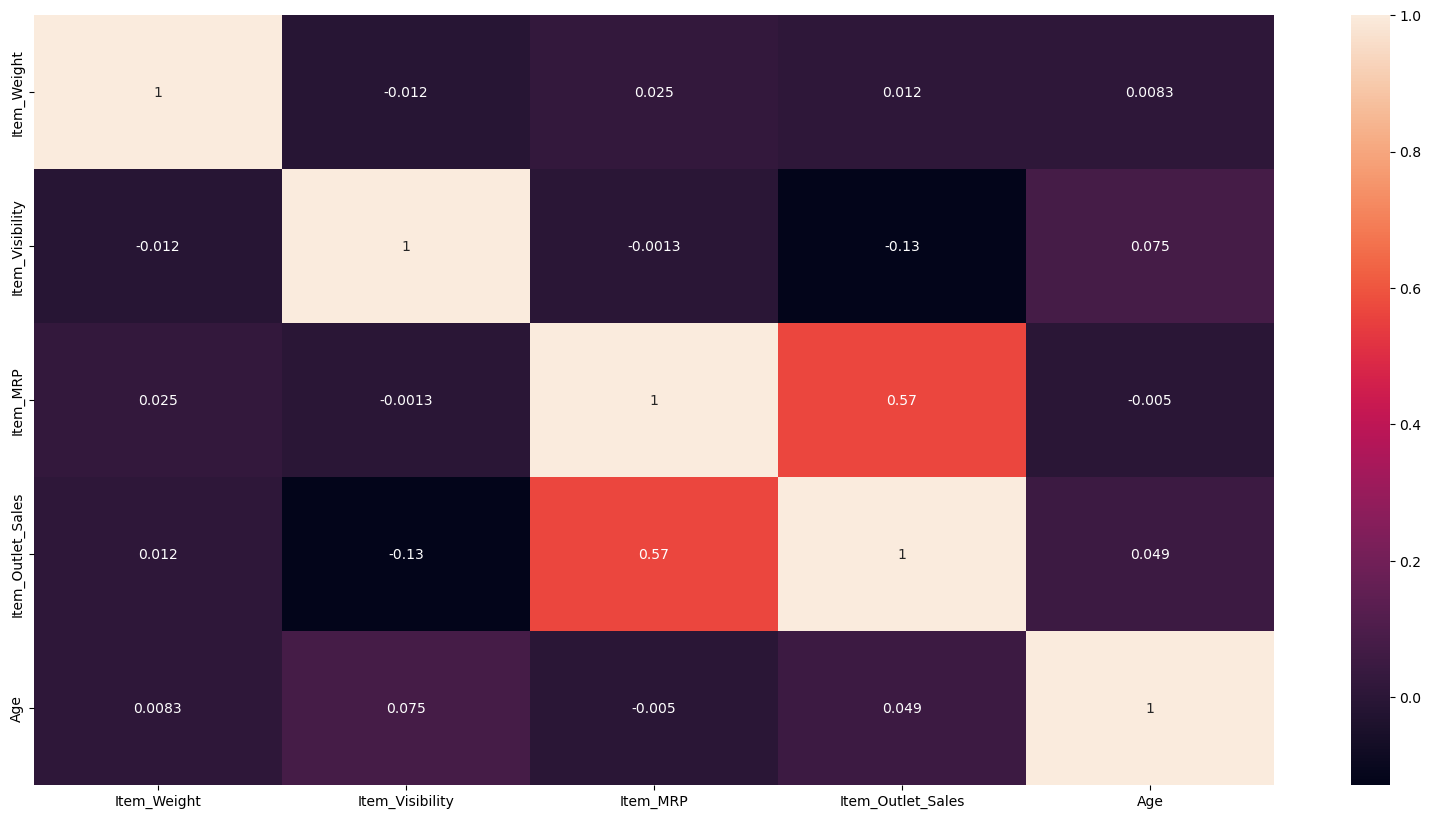%0A)

#### Note other than Outlet Size and Outlet Location Type none of the variables seems to be correlated so problem of multicollinearity seems to be very low<a
href="#Note-other-than-Outlet-Size-and-Outlet-Location-Type-none-of-the-variables-seems-to-be-correlated-so-problem-of-multicollinearity-seems-to-be-very-low"
class="anchor-link">¶</a>

In \[84\]:

    Salestrain.head()

Out\[84\]:

|     | Item_Weight | Item_Fat_Content | Item_Visibility | Item_Type             | Item_MRP | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Item_Outlet_Sales | Age |
|-----|-------------|------------------|-----------------|-----------------------|----------|-------------|----------------------|-------------------|-------------------|-----|
| 0   | 9.30        | Low Fat          | 0.016047        | Dairy                 | 249.8092 | Medium      | Tier 1               | Supermarket Type1 | 3735.1380         | 24  |
| 1   | 5.92        | Regular          | 0.019278        | Soft Drinks           | 48.2692  | Medium      | Tier 3               | Supermarket Type2 | 443.4228          | 14  |
| 2   | 17.50       | Low Fat          | 0.016760        | Meat                  | 141.6180 | Medium      | Tier 1               | Supermarket Type1 | 2097.2700         | 24  |
| 3   | 19.20       | Regular          | 0.000000        | Fruits and Vegetables | 182.0950 | Medium      | Tier 3               | Grocery Store     | 732.3800          | 25  |
| 4   | 8.93        | Low Fat          | 0.000000        | Household             | 53.8614  | High        | Tier 3               | Supermarket Type1 | 994.7052          | 36  |

In \[85\]:

    Salestest.head()

Out\[85\]:

|     | Item_Weight | Item_Fat_Content | Item_Visibility | Item_Type   | Item_MRP | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Age |
|-----|-------------|------------------|-----------------|-------------|----------|-------------|----------------------|-------------------|-----|
| 0   | 20.750000   | Low Fat          | 0.007565        | Snack Foods | 107.8622 | Medium      | Tier 1               | Supermarket Type1 | 24  |
| 1   | 8.300000    | Regular          | 0.038428        | Dairy       | 87.3198  | Medium      | Tier 2               | Supermarket Type1 | 16  |
| 2   | 14.600000   | Low Fat          | 0.099575        | Others      | 241.7538 | Medium      | Tier 3               | Grocery Store     | 25  |
| 3   | 7.315000    | Low Fat          | 0.015388        | Snack Foods | 155.0340 | Medium      | Tier 2               | Supermarket Type1 | 16  |
| 4   | 12.695633   | Regular          | 0.118599        | Dairy       | 234.2300 | Medium      | Tier 3               | Supermarket Type3 | 38  |

In \[86\]:

    cont_features

Out\[86\]:

    ['Item_Weight', 'Item_Visibility', 'Item_MRP']

In \[87\]:

    Salestrain.head()

Out\[87\]:

|     | Item_Weight | Item_Fat_Content | Item_Visibility | Item_Type             | Item_MRP | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Item_Outlet_Sales | Age |
|-----|-------------|------------------|-----------------|-----------------------|----------|-------------|----------------------|-------------------|-------------------|-----|
| 0   | 9.30        | Low Fat          | 0.016047        | Dairy                 | 249.8092 | Medium      | Tier 1               | Supermarket Type1 | 3735.1380         | 24  |
| 1   | 5.92        | Regular          | 0.019278        | Soft Drinks           | 48.2692  | Medium      | Tier 3               | Supermarket Type2 | 443.4228          | 14  |
| 2   | 17.50       | Low Fat          | 0.016760        | Meat                  | 141.6180 | Medium      | Tier 1               | Supermarket Type1 | 2097.2700         | 24  |
| 3   | 19.20       | Regular          | 0.000000        | Fruits and Vegetables | 182.0950 | Medium      | Tier 3               | Grocery Store     | 732.3800          | 25  |
| 4   | 8.93        | Low Fat          | 0.000000        | Household             | 53.8614  | High        | Tier 3               | Supermarket Type1 | 994.7052          | 36  |

In \[88\]:

    Salestest.head()

Out\[88\]:

|     | Item_Weight | Item_Fat_Content | Item_Visibility | Item_Type   | Item_MRP | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Age |
|-----|-------------|------------------|-----------------|-------------|----------|-------------|----------------------|-------------------|-----|
| 0   | 20.750000   | Low Fat          | 0.007565        | Snack Foods | 107.8622 | Medium      | Tier 1               | Supermarket Type1 | 24  |
| 1   | 8.300000    | Regular          | 0.038428        | Dairy       | 87.3198  | Medium      | Tier 2               | Supermarket Type1 | 16  |
| 2   | 14.600000   | Low Fat          | 0.099575        | Others      | 241.7538 | Medium      | Tier 3               | Grocery Store     | 25  |
| 3   | 7.315000    | Low Fat          | 0.015388        | Snack Foods | 155.0340 | Medium      | Tier 2               | Supermarket Type1 | 16  |
| 4   | 12.695633   | Regular          | 0.118599        | Dairy       | 234.2300 | Medium      | Tier 3               | Supermarket Type3 | 38  |

In \[89\]:

    X = Salestrain[cont_features]
    X.head()

Out\[89\]:

|     | Item_Weight | Item_Visibility | Item_MRP |
|-----|-------------|-----------------|----------|
| 0   | 9.30        | 0.016047        | 249.8092 |
| 1   | 5.92        | 0.019278        | 48.2692  |
| 2   | 17.50       | 0.016760        | 141.6180 |
| 3   | 19.20       | 0.000000        | 182.0950 |
| 4   | 8.93        | 0.000000        | 53.8614  |

In \[90\]:

    Salestest2 = Salestest[cont_features]
    Salestest2.head()

Out\[90\]:

|     | Item_Weight | Item_Visibility | Item_MRP |
|-----|-------------|-----------------|----------|
| 0   | 20.750000   | 0.007565        | 107.8622 |
| 1   | 8.300000    | 0.038428        | 87.3198  |
| 2   | 14.600000   | 0.099575        | 241.7538 |
| 3   | 7.315000    | 0.015388        | 155.0340 |
| 4   | 12.695633   | 0.118599        | 234.2300 |

In \[91\]:

    # Calculating VIF for all numerical variables
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    x = Salestrain[['Item_Weight', 'Item_Visibility', 'Item_MRP']]

    vif = pd.DataFrame()
    vif["features"] = x.columns
    vif["vif_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif

Out\[91\]:

|     | features        | vif_Factor |
|-----|-----------------|------------|
| 0   | Item_Weight     | 4.753126   |
| 1   | Item_Visibility | 2.368765   |
| 2   | Item_MRP        | 4.378331   |

#### As vif of numerical variables is below 5 we might not be concerned about multicollinearity<a
href="#As-vif-of-numerical-variables-is-below-5-we-might-not-be-concerned-about-multicollinearity"
class="anchor-link">¶</a>

#### It is always better to check for skewness since data might not be normally distributed<a
href="#It-is-always-better-to-check-for-skewness-since-data-might-not-be-normally-distributed"
class="anchor-link">¶</a>

In \[92\]:

    Salestrain.skew()

Out\[92\]:

    Item_Weight          0.090561
    Item_Visibility      1.167091
    Item_MRP             0.127202
    Item_Outlet_Sales    1.177531
    Age                  0.396641
    dtype: float64

In \[228\]:

    # Before Scaling
    fig, ax = plt.subplots(2,3,figsize = (9,9))
    sns.distplot(Salestrain["Item_Visibility"], kde =True, ax=ax[0,0], color = "red")
    sns.distplot(Salestrain["Item_MRP"], kde =True, ax=ax[0,1], color = "blue")
    sns.distplot(Salestrain["Age"], kde =True, ax=ax[0,2], color = "orange")
    sns.distplot(Salestrain["Item_Outlet_Sales"], kde =True, ax=ax[1,0], color = "magenta")
    sns.distplot(Salestrain["Item_Weight"], kde =True, ax=ax[1,1], color = "black")

Out\[228\]:

    <AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

![](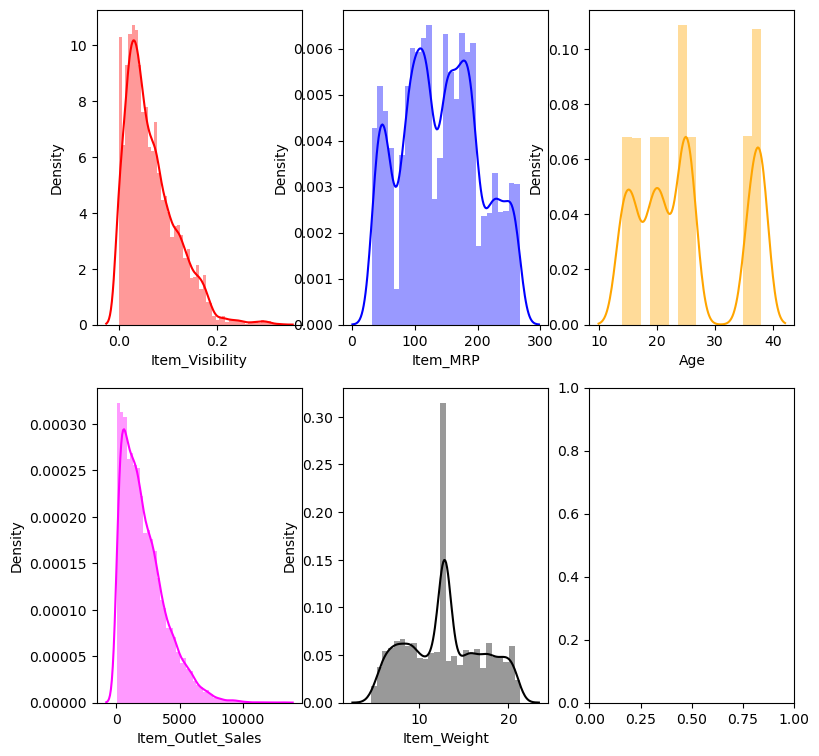%0A)

#### As it visibile Item_Outlet_Sales and Item_Visbility is positively skewed hence we apply logarithmic transformation<a
href="#As-it-visibile-Item_Outlet_Sales-and-Item_Visbility-is-positively-skewed-hence-we-apply-logarithmic-transformation"
class="anchor-link">¶</a>

In \[94\]:

    cat_train = Salestrain.select_dtypes(include=['object']).columns
    cat_test = Salestest.select_dtypes(include=['object']).columns

    num_train = Salestrain.select_dtypes(exclude = ['object']).columns
    num_test = Salestest.select_dtypes(exclude = ['object']).columns

    print("Numerical features : " + str(len(num_train)))
    print("Categorical features : " + str(len(cat_train)))

    feat_cat_train = Salestrain[cat_train]
    feat_cat_test = Salestest[cat_test]
    feat_num_train = Salestrain[num_train]
    feat_num_test = Salestest[num_test]

    Numerical features : 5
    Categorical features : 5

In \[95\]:

    from scipy.stats import skew 
    skewness = feat_num_train.apply(lambda x: skew(x))
    skewness.sort_values(ascending=False)

Out\[95\]:

    Item_Outlet_Sales    1.177323
    Item_Visibility      1.166885
    Age                  0.396571
    Item_MRP             0.127180
    Item_Weight          0.090546
    dtype: float64

In \[96\]:

    ## Transforming features in train data 

    skewness = skewness[abs(skewness) > 0.50]
    skewed_index = skewness.index

    for i in skewed_index:
        feat_num_train[i] = np.log(feat_num_train[i]+1)

In \[97\]:

    ## Transforming features in test data for the same features

    for i in skewed_index[skewed_index != 'Item_Outlet_Sales']:
        feat_num_test[i] = np.log(feat_num_test[i]+1)

In \[98\]:

    y = feat_num_train['Item_Outlet_Sales']
    feat_num_train = feat_num_train.drop("Item_Outlet_Sales",axis=1)

#### One Hot Encoding the categorical variables<a href="#One-Hot-Encoding-the-categorical-variables"
class="anchor-link">¶</a>

In \[99\]:

    from sklearn.preprocessing import OneHotEncoder

    OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse = False)
    OH_train = pd.DataFrame(OH_encoder.fit_transform(feat_cat_train))
    OH_test = pd.DataFrame(OH_encoder.transform(feat_cat_test))

    # One-hot encoding removed index; put it back
    OH_train.index = feat_cat_train.index
    OH_test.index = feat_cat_test.index

#### To choose the best model we use the Recursive Feature Elimination method and Decision Tree Regression has been used to choose the best features<a
href="#To-choose-the-best-model-we-use-the-Recursive-Feature-Elimination-method-and-Decision-Tree-Regression-has-been-used-to-choose-the-best-features"
class="anchor-link">¶</a>

In \[100\]:

    from sklearn.feature_selection import RFE
    from sklearn.tree import DecisionTreeRegressor

    rfe = RFE(estimator = DecisionTreeRegressor(),n_features_to_select=20)
    rfe.fit(feat_num_train, y)

    selected_feat_RFE = feat_num_train.columns[(rfe.get_support())]

    # let's print some stats
    print('Total features: {}'.format((feat_num_train.shape[1])))
    print('Selected features: {}'.format(len(selected_feat_RFE)))
    print('The selected features are: {}'.format(selected_feat_RFE))

    Total features: 4
    Selected features: 4
    The selected features are: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Age'], dtype='object')

In \[101\]:

    X = pd.concat([OH_train,feat_num_train],axis = 1)
    X_test = pd.concat([OH_test,feat_num_test], axis = 1)
    X.columns = X.columns.astype(str)
    X_test.columns = X_test.columns.astype(str)

### Train Test Split<a href="#Train-Test-Split" class="anchor-link">¶</a>

In \[102\]:

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Classification Exercise<a href="#Classification-Exercise" class="anchor-link">¶</a>

### Linear Regression<a href="#Linear-Regression" class="anchor-link">¶</a>

In \[221\]:

    import statsmodels.api as sm
    # Fit the linear regression model
    model = sm.OLS(y_train, x_train).fit()

In \[222\]:

    y_pred=model.predict(x_test)

In \[223\]:

    rmse_lin = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2_score = metrics.r2_score(y_test, y_pred)
    print('Root Mean Squared Error:',rmse_lin )
    print('R2_Score:',r2_score*100,"%" )

    Root Mean Squared Error: 0.5515520555642495
    R2_Score: 71.42586803830434 %

#### While the RMSE of our Linear Regression model is 0.5515520555642495 the R2_Score is 71.42586803830434 %<a
href="#While-the-RMSE-of-our-Linear-Regression-model-is-0.5515520555642495-the-R2_Score-is-71.42586803830434-%25"
class="anchor-link">¶</a>

In \[106\]:

    residue_lreg = y_test - y_pred
    #Plotting Residual Plot
    plt.scatter(y_test,residue_lreg, c = "brown")
    plt.xlabel("Residual Plot for Linear Regression")
    plt.ylabel("y_test")
    plt.axhline(y = 0)

Out\[106\]:

    <matplotlib.lines.Line2D at 0x2356e787850>

![](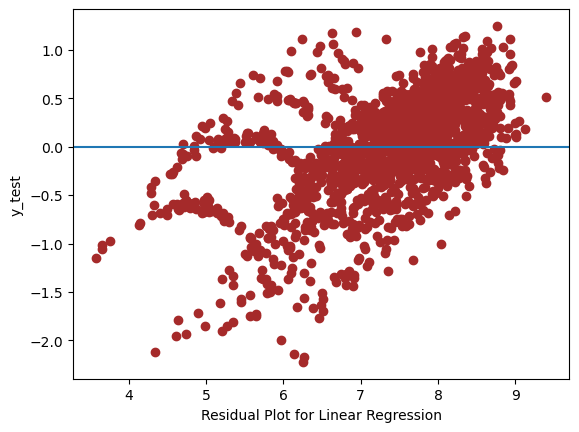%0A)

#### Interpretation required<a href="#Interpretation-required" class="anchor-link">¶</a>

### Elastic Net<a href="#Elastic-Net" class="anchor-link">¶</a>

#### Since basic Elastic Model has a bad R^2 score and high RMSE in the presence of default parameters we intend to grid search from the parameters matrix<a
href="#Since-basic-Elastic-Model-has-a-bad-R%5E2-score-and-high-RMSE-in-the-presence-of-default-parameters-we-intend-to-grid-search-from-the-parameters-matrix"
class="anchor-link">¶</a>

In \[209\]:

    # Hyper-paramaters to be used during tuning. The specific range for each hyper-parameter 
    # was selected after carrying out several iterations.
    e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
    e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
    alphas_ridge = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
    alphas_lasso = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

In \[108\]:

    #Create model scoring and kfolds functions

    kfolds = KFold(n_splits=10)

In \[109\]:

    from sklearn.linear_model import ElasticNet

    # Create an instance of the ElasticNet model
    elastic_net = ElasticNetCV(alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio)

    # Fit the model to your training data
    elastic_net.fit(x_train, y_train)

    # Predictions
    predictions = elastic_net.predict(x_test)

In \[139\]:

    rmse_EN = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    en_score = metrics.r2_score(y_test, predictions)
    print('Root Mean Squared Error:',rmse_EN )
    print('R2_Score:',en_score*100,"%" )

    Root Mean Squared Error: 0.5513000874440245
    R2_Score: 71.45196938519395 %

#### While the RMSE of our Elastic Net Regression model is 0.5513000874440245 the R2_Score is 71.45196938519395 % respectively<a
href="#While-the-RMSE-of-our-Elastic-Net-Regression-model-is-0.5513000874440245-the-R2_Score-is-71.45196938519395-%25-respectively"
class="anchor-link">¶</a>

In \[111\]:

    residue_lreg = y_test - predictions
    #Plotting Residual Plot
    plt.scatter(y_test,residue_lreg, c = "brown")
    plt.xlabel("Residual Plot for Elastic Net Regression")
    plt.ylabel("y_test")
    plt.axhline(y = 0)

Out\[111\]:

    <matplotlib.lines.Line2D at 0x2356fe2e7c0>

![](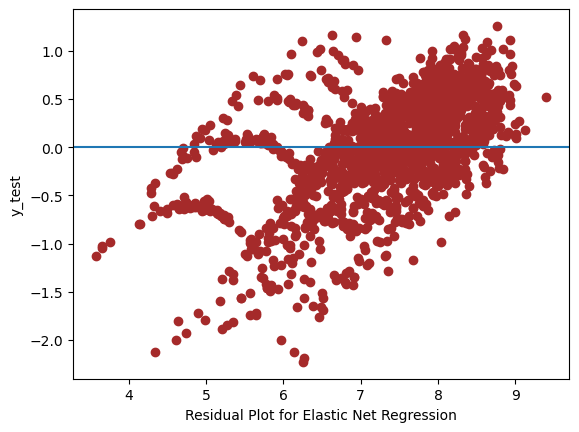%0A)

#### Interpretation<a href="#Interpretation" class="anchor-link">¶</a>

### Lasso Regression<a href="#Lasso-Regression" class="anchor-link">¶</a>

In \[210\]:

    #fitting the model
    from sklearn.linear_model import Lasso, Ridge
    ls = LassoCV(alphas=alphas_lasso, cv=kfolds)
    ls = ls.fit(x_train, y_train)

In \[211\]:

    ls_pred=ls.predict(x_test)

In \[212\]:

    from sklearn.metrics import r2_score
    rmse = np.sqrt(metrics.mean_squared_error(y_test, ls_pred))
    r2_score_LS = r2_score(y_test, ls_pred)
    print('R2_Score:',r2_score_LS*100,"%" )
    print('Root Mean Squared Error:',rmse )

    R2_Score: 71.45588830765148 %
    Root Mean Squared Error: 0.5512622463671155

#### While the RMSE of our Lasso Regression model is 0.5537688387403791 the R2_Score is 71.19571769469881 % respectively<a
href="#While-the-RMSE-of-our-Lasso-Regression-model-is-0.5537688387403791-the-R2_Score-is-71.19571769469881-%25-respectively"
class="anchor-link">¶</a>

In \[213\]:

    residue_lreg = y_test - y_pred
    #Plotting Residual Plot
    plt.scatter(y_test,residue_lreg, c = "brown")
    plt.xlabel("Residual Plot for Lasso Regression")
    plt.ylabel("y_test")
    plt.axhline(y = 0)

Out\[213\]:

    <matplotlib.lines.Line2D at 0x2356fe2ed30>

![](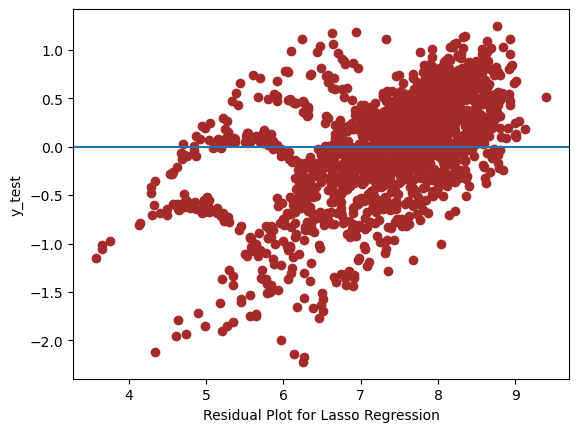%0A)

#### Interpretation<a href="#Interpretation" class="anchor-link">¶</a>

### Ridge Regression<a href="#Ridge-Regression" class="anchor-link">¶</a>

In \[214\]:

    #Ridge Regression
    rr = RidgeCV(alphas=alphas_ridge, cv=kfolds)
    rr.fit(x_train, y_train)

Out\[214\]:

    RidgeCV(alphas=[14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5],
            cv=KFold(n_splits=10, random_state=None, shuffle=False))

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

RidgeCV

    RidgeCV(alphas=[14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5],
            cv=KFold(n_splits=10, random_state=None, shuffle=False))

In \[217\]:

    #Prediction AFTER Ridge regression
    rr_pred = rr.predict(x_test)

In \[218\]:

    #Accuracy score check and RMSE
    rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, rr_pred))
    print('Root Mean Squared Error:',rmse_ridge )
    r2_score_RR = r2_score(y_test, y_pred)
    print('R2_Score:',r2_score_RR*100,"%" )

    Root Mean Squared Error: 0.5517871779846749
    R2_Score: 71.42586803830434 %

#### While the RMSE of our Ridge Regression model is 0.5515518531400582 the R2_Score is 71.42586803830434 % respectively<a
href="#While-the-RMSE-of-our-Ridge-Regression-model-is-0.5515518531400582-the-R2_Score-is-71.42586803830434-%25-respectively"
class="anchor-link">¶</a>

In \[219\]:

    #residue after ridge
    residue_rr = y_test-rr_pred
    #Plotting Residual Plot
    plt.scatter(y_test,residue_rr, c = "blue")
    plt.xlabel("Residual Plot for Ridge Regression")
    plt.ylabel("y_test")
    plt.axhline(y = 0)

Out\[219\]:

    <matplotlib.lines.Line2D at 0x2356e229af0>

![](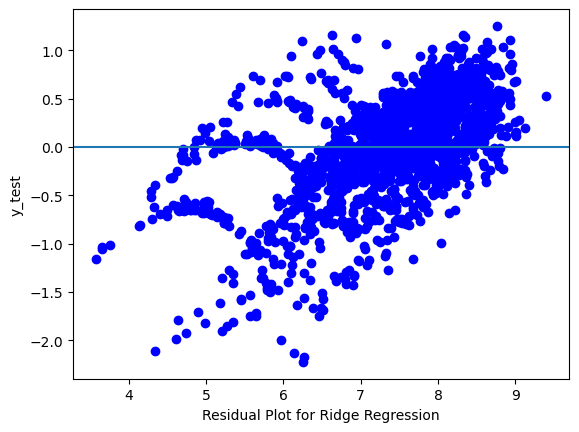%0A)

#### Interpretation<a href="#Interpretation" class="anchor-link">¶</a>

### Decision Tree Regressor Model<a href="#Decision-Tree-Regressor-Model" class="anchor-link">¶</a>

In \[198\]:

    # Create a Decision Tree regressor model
    dt_model = DecisionTreeRegressor(random_state=42)

    # Train the model on the training data
    dt_model.fit(x_train, y_train)

    # Make predictions on the test data
    dt_pred = dt_model.predict(x_test)

In \[197\]:

    # Evaluate the model
    rmse_dt = np.sqrt(metrics.mean_squared_error(y_test, dt_pred))
    print('Root Mean Squared Error:',rmse_dt )
    r2_dt = metrics.r2_score(y_test, dt_pred)
    print('R-squared:', r2_dt)

    Root Mean Squared Error: 0.7577915929905223
    R-squared: 0.4606140908409836

#### While the RMSE of our Decision Tree Regression model is 0.7577915929905223 the R2_Score is 0.4606140908409836 respectively<a
href="#While-the-RMSE-of-our-Decision-Tree-Regression-model-is-0.7577915929905223-the-R2_Score-is-0.4606140908409836--respectively"
class="anchor-link">¶</a>

In \[199\]:

    #residue after decision tree
    residue_dt = y_test-dt_pred
    #Plotting Residual Plot
    plt.scatter(y_test,residue_dt, c = "yellow")
    plt.xlabel("Residual Plot for Decision Tree Regression")
    plt.ylabel("y_test")
    plt.axhline(y = 0)

Out\[199\]:

    <matplotlib.lines.Line2D at 0x2357185d520>

![](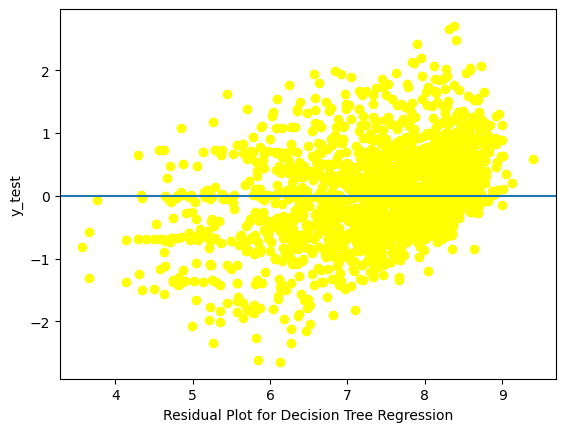%0A)

#### Interpretation<a href="#Interpretation" class="anchor-link">¶</a>

### Random Forest Regressor<a href="#Random-Forest-Regressor" class="anchor-link">¶</a>

In \[121\]:

    # Create a Random Forest regressor model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model on the training data
    rf_model.fit(x_train, y_train)

    # Make predictions on the test data
    rf_pred = rf_model.predict(x_test)

    # Evaluate the model
    rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, rf_pred))
    print('Root Mean Squared Error:',rmse_rf )
    r2_rf = metrics.r2_score(y_test, rf_pred)
    print('R-squared:', r2_rf)

    #residue after random forest
    residue_rf = y_test-rf_pred

    #Plotting Residual Plot
    plt.scatter(y_test,residue_rf, c = "green")
    plt.xlabel("Residual Plot for Random Forest Regression")
    plt.ylabel("y_test")
    plt.axhline(y = 0)

    Root Mean Squared Error: 0.5678768756082895
    R-squared: 0.6970936348217647

Out\[121\]:

    <matplotlib.lines.Line2D at 0x2356ffce3d0>

![](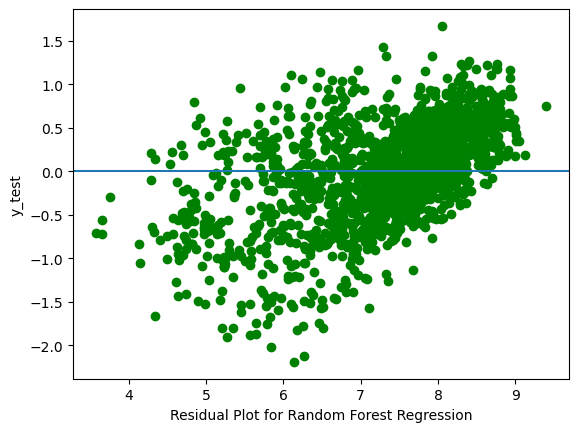%0A)

#### While the RMSE of our Random model is 0.5678768756082895 the R2_Score is 0.6970936348217647 respectively<a
href="#While-the-RMSE-of-our-Random--model-is-0.5678768756082895-the-R2_Score-is-0.6970936348217647-respectively"
class="anchor-link">¶</a>

### Ranking<a href="#Ranking" class="anchor-link">¶</a>

In \[224\]:

    pd.DataFrame(data = {'Random Forest': r2_rf, "Lasso Regression": r2_score_LS,"Ridge Regression":r2_score_RR,'Linear Regression': r2_score, 'Decision Tree':r2_dt, 'Elastic Net': en_score},index = ['R2_Score'])

Out\[224\]:

|          | Random Forest | Lasso Regression | Ridge Regression | Linear Regression | Decision Tree | Elastic Net |
|----------|---------------|------------------|------------------|-------------------|---------------|-------------|
| R2_Score | 0.697094      | 0.714559         | 0.714259         | 0.714259          | 0.460614      | 0.71452     |

#### Thus inter<a href="#Thus-inter" class="anchor-link">¶</a>

In \[225\]:

    scoring = pd.DataFrame({'Ridge': rmse_ridge,"Lasso": rmse,"ElasticNet": rmse_EN,"LinReg" : rmse_lin,"RandomForest" : rmse_rf,"DecisionTree": rmse_dt}, index = ['RMSE'])
    scoring

Out\[225\]:

|      | Ridge    | Lasso    | ElasticNet | LinReg   | RandomForest | DecisionTree |
|------|----------|----------|------------|----------|--------------|--------------|
| RMSE | 0.551787 | 0.551262 | 0.5513     | 0.551552 | 0.567877     | 0.757792     |

In \[226\]:

    plt.figure(figsize=(8,6))
    plt.title('Root Mean Square plot of different models')
    sns.barplot(data = scoring)
    plt.xlabel("Model")
    plt.ylabel("RMSE Score")

Out\[226\]:

    Text(0, 0.5, 'RMSE Score')

![](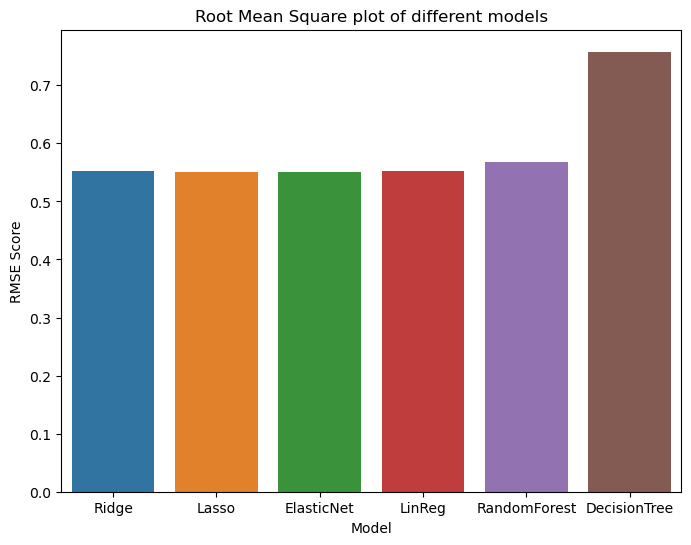%0A)

In \[122\]:

    SalesPredicted=elastic_net.predict(X_test)

In \[123\]:

    #Performing inverse transformation
    actual_item_outsale = np.exp(SalesPredicted)-1

In \[124\]:

    actual_item_outsale

Out\[124\]:

    array([1373.36123556, 1120.38912505,  601.48476623, ..., 1547.18952135,
           3552.7666112 , 1155.9846947 ])

In \[125\]:

    ItemSales=pd.DataFrame(actual_item_outsale)

In \[126\]:

    Salestest=Salestest.join(ItemSales)

In \[127\]:

    Salestest=Salestest.rename(columns={0:"Predicted Sales"})

In \[132\]:

    Salestest.to_csv('SalesPred.csv')

# 

\~ DEVJIT GHOSH

<a href="#-~-DEVJIT-GHOSH" class="anchor-link">¶</a>